# A Book Recommender System based on an Exploratory Data Analysis on 52,000 books

<b><i>Language Used: Python,
    
Libraries Used: pandas, numPy, matplotlib, seaborn

As a reader(and someone who is very picky when it comes to books), I often struggle while determining my next read. Of course, there are various sites that suggest books and share book reviews and ratings, but it can get a bit challenging to choose a book just from those text reviews. The key points we are looking for may not be immediately apparent and this often ends up creating more dilemmas. For instance, if you wanted a list of books under the fiction and fantasy genre, with the highest average ratings, also liked by at least 75% of the readers, how would you search for it? Or a list of self-help books, particularly after the year 2000, also listed in the Best Books ever with top scores? Or if you are looking for something cheap as well as good, or books that are not too long so you can finish them in an hour(or less)? I mean the list goes on and on and on. So wouldn't it be much easier if you could simply look into different visual graphs and use it as a guide to choose a book as per your preferences?

Keeping these things in mind among many other things, I decided to perform an exploratory data analysis on the data of 'GoodReads Best Books Ever list'. The dataset I am using for this contains the records of approximately 52,000 different books, out of which around 36,000 books are written in the English language! So, by using a variety of graphs to show the relationship between different key elements(genre, ratings, number of pages, bbe scores, liked Percentage, publish date, among many other elements), I will provide you with insights and help you make better and more objective decisions.

You can simply think of this as a book recommender system driven by data. As you read through, you will notice that I have also put up download links to the books(the ones I could find) so you can download them directly to your device!

### "Sometimes, you read a book and it fills you with this weird evangelical zeal, and you become convinced that the shattered world will never be put back together unless and until all living humans read the book."
<b>-John Green</b>


In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager as fm, rcParams


plt.rcParams['font.sans-serif']=['SimHei'] 


#Specify the default font
plt.rcParams['font.sans-serif'] = ['SimHei'] #Show Chinese labels
plt.rcParams['axes.unicode_minus']=False #Solve the problem that the minus sign '-' is displayed as a square
plt.rcParams['font.family']='sans-serif'
plt.rcParams["font.family"] = "Phetsarath OT"

 
missing_values = ['na','NA', 'N/A', 'N/a', 'not available', 'missing', np.nan] 
df = pd.read_csv('https://github.com/scostap/goodreads_bbe_dataset/blob/main/Best_Books_Ever_dataset/books_1.Best_Books_Ever.csv?raw=true', error_bad_lines = False, na_values = missing_values)

#fxn to remove duplicates
def remove_dup(dataframe):
    org_df = dataframe.drop_duplicates()
    return org_df

def clean_data(dataframe):
    a = remove_dup(dataframe) #using the fxn to remove duplicates
    a = a.dropna(how = 'all') #drop the records that have ALL na values
    a = a.dropna(axis=1, how='all') #drop the columns that have ALL na values
    return a

clean_df = clean_data(df)

req_dff = clean_df[['title', 'author', 'rating', 'language', 'genres', 'pages', 'publishDate','awards', 'numRatings', 'likedPercent','setting','bbeScore', 'bbeVotes','description','price' ]]


searchfor = ['complete', 'collection', 'set', 'Collection', 'Complete', 'Set', 'Bundle', 'bundle', 'collective', 'Piano Solos', 'One Direction', 'Bible', 'bible', 'Church'] #removing collections/book bundles
solo_df = req_dff[~req_dff.title.str.contains('|'.join(searchfor))]

nextsearch = ['Anonymous', 'anonymous']
solo_df = solo_df[~req_dff.author.str.contains('|'.join(nextsearch))]


solo_df['publishDate'] = pd.to_datetime(solo_df['publishDate'], errors='coerce') #converting publishDate to datetime object


solo_df['pages'].replace('1 page', np.nan, inplace = True) #removing specific term
solo_df['pages'] =solo_df['pages'].astype(float) #converting pages to float dtype

solo_df = solo_df.loc[solo_df['language'] == 'English'] #only the books in English language
solo_df = solo_df.loc[solo_df['pages'] > 0] #books with atleast one page
solo_df = solo_df.loc[solo_df['numRatings'] > 100] #books with atleast 100 ratings
solo_df = solo_df.loc[solo_df['likedPercent'] > 0] #books that atleast 0.1% people liked
solo_df = solo_df.drop('language', axis = 1)#dropping the language column
# solo_df.set_index('publishDate', inplace =True) #setting date as the index

#fxn to convert string to list
def str_to_list(str):
    lst = str.split(',')
    return [x.replace("'", "").replace("[", "").replace("]","").strip(' ') for x in lst]

#fxn to create a new dataframe taking the list as genre
def b_n_t():
    column_names = ['title', 'author', 'rating', 'genre', 'pages', 'publishDate','awards', 'numRatings', 'likedPercent','setting','bbeScore', 'bbeVotes','description','price']

    new_df = pd.DataFrame(columns = column_names)
    for index, row in solo_df.iterrows():
        p_g_lst = str_to_list(row[3])
        new_row = {'title':row[0],  'author': row[1], 'rating': row[2], 'genre':p_g_lst, 'pages': row[4], 'publishDate': row[5], 'awards': row[6], 'numRatings': row[7], 'likedPercent': row[8],'setting': row[9],'bbeScore': row[10], 'bbeVotes': row[11],'description': row[12],'price': row[13]}
        new_df = new_df.append(new_row, ignore_index=True)
    return new_df

list_df = b_n_t()
list_df['author'] = list_df['author'].str.split(',').str[0]
list_df['title_by_author'] = list_df['title'] + ' BY ' + list_df['author']
list_df

<ipython-input-13-7b62ac415330>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  solo_df = solo_df[~req_dff.author.str.contains('|'.join(nextsearch))]


title  \
0                               The Hunger Games   
1      Harry Potter and the Order of the Phoenix   
2                          To Kill a Mockingbird   
3                            Pride and Prejudice   
4                                       Twilight   
...                                          ...   
35830                                  Elemental   
35831                               Unbelievable   
35832                                     Marked   
35833                                Wayward Son   
35834                        Daughter of Helaman   

                                  author  rating  \
0                        Suzanne Collins    4.33   
1                           J.K. Rowling    4.50   
2                             Harper Lee    4.28   
3                            Jane Austen    4.26   
4                        Stephenie Meyer    3.60   
...                                  ...     ...   
35830  Kim Richardson (Goodreads Author)    4.07   
35831   Sherry Gammon (Goodreads Author)    4.16   
35832  Kim Richardson (Goodreads Author)    3.70   
35833     Tom Pollack (Goodreads Author)    3.85   
35834    Misty Moncur (Goodreads Author)    4.02   

                                                   genre  pages publishDate  \
0      [Young Adult, Fiction, Dystopia, Fantasy, Scie...  374.0  2008-09-14   
1      [Fantasy, Young Adult, Fiction, Magic, Childre...  870.0  2004-09-28   
2      [Classics, Fiction, Historical Fiction, School...  324.0  2006-05-23   
3      [Classics, Fiction, Romance, Historical Fictio...  279.0  2000-10-10   
4      [Young Adult, Fantasy, Romance, Vampires, Fict...  501.0  2006-09-06   
...                                                  ...    ...         ...   
35830  [Fantasy, Young Adult, Angels, Romance, Parano...  151.0  2011-08-21   
35831  [Romance, Young Adult, Contemporary, Contempor...  360.0  2013-04-11   
35832  [Fantasy, Young Adult, Paranormal, Angels, Rom...  280.0  2011-03-18   
35833  [Fiction, Mystery, Historical Fiction, Adventu...  507.0  2011-09-01   
35834  [Lds Fiction, Historical Fiction, Young Adult,...  201.0  2011-05-08   

                                                  awards numRatings  \
0      ['Locus Award Nominee for Best Young Adult Boo...    6376780   
1      ['Bram Stoker Award for Works for Young Reader...    2507623   
2      ['Pulitzer Prize for Fiction (1961)', 'Audie A...    4501075   
3                                                     []    2998241   
4      ['Georgia Peach Book Award (2007)', 'Buxtehude...    4964519   
...                                                  ...        ...   
35830                                                 []       1947   
35831                                                 []       1028   
35832            ["Readers' Favorite Book Award (2011)"]       6674   
35833                                                 []        238   
35834                                                 []        246   

       likedPercent                                            setting  \
0              96.0  ['District 12, Panem', 'Capitol, Panem', 'Pane...   
1              98.0  ['Hogwarts School of Witchcraft and Wizardry (...   
2              95.0               ['Maycomb, Alabama (United States)']   
3              94.0  ['United Kingdom', 'Derbyshire, England (Unite...   
4              78.0  ['Forks, Washington (United States)', 'Phoenix...   
...             ...                                                ...   
35830          94.0                                                 []   
35831          94.0            ['Port Fare, New York (United States)']   
35832          84.0                                                 []   
35833          90.0                                                 []   
35834          90.0                                                 []   

      bbeScore bbeVotes                                        description  \
0      2993816    30516 

<b>After cleaning and preprocessing, my dataset now contains 35835 books. Also, it’s obvious that the initial dataset has tons of information, however, in this analysis, I will be focusing on the following attributes:</b>

1. title: Title of the book
2. author: Author of the book
3. rating: Global goodreads rating
4. genre: The list of genres that the books falls under
5. pages: Number of pages
6. publishDate: Publication Date
7. awards: List of awards received by the book
8. numRatings: Number of total Ratings
9. likedPercent: Derived field, percent of ratings over 2 stars (as in GoodReads)
10. setting: Story Setting
11. bbeScore: Score in Best Books Ever list
12. bbeVotes: Number of votes in Best Books Ever list
13. description: Book's description
14. price: Book's price (extracted from Iberlibro)
15. Book Title with the Author's Name.



### "... a mind needs books as a sword needs a whetstone, if it is to keep its edge."
<b>-George R.R. Martin

In [17]:
#setting some styles:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (11, 7)
matplotlib.rcParams['figure.facecolor'] = '#0f0f0f80'

So let's begin!

# 1.  Exploratory Analysis and Visualization:

## (i) Top 10 authors with the most number of books:

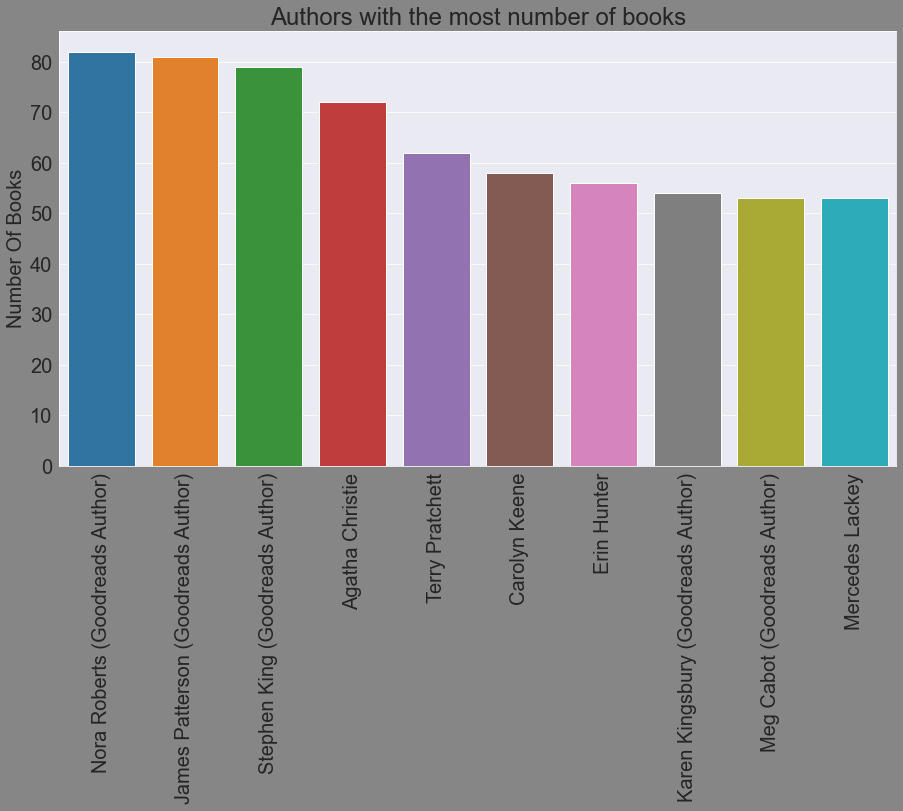

In [18]:

top_authors = list_df.author.value_counts().head(10)

plt.figure(figsize = (15,8))
sns.barplot(x= top_authors.index, y= top_authors)
plt.title('Authors with the most number of books')
plt.ylabel("Number Of Books");
plt.xticks(rotation=90);

<b>Nora Roberts</b> tops this list with the most number of books(over 80 books), followed by <b>James Patterson</b>, <b>Stephen King</b>, <b>Agatha Christie</b>, and so on.
(I remember reading a book called "The ABC murders" by Agatha Christie just last year. It's a pretty good murder mystery! Download it [HERE](http://library.lol/main/856C25A37C3D30FB54ED93F4AD1802CA) if you wanna read it.)

## (ii) Top 10 Books with the maximum votes on the Best Books Ever list:

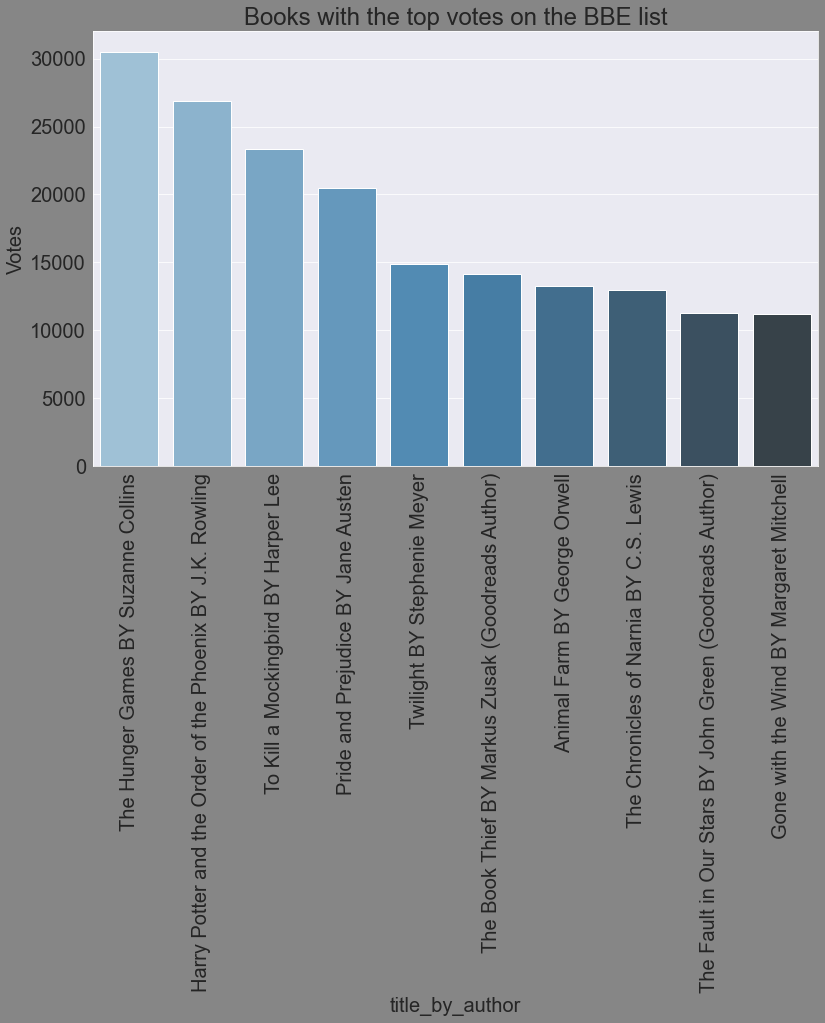

In [19]:
top_bbe_books = list_df.set_index('title_by_author')
top_bbe_books = top_bbe_books.sort_values('bbeVotes', ascending = False).head(10)
bbeVotes_count = top_bbe_books['bbeVotes']

plt.figure(figsize = (13,8))
# pal = sns.color_palette("Greens_d", len(data))
sns.barplot(x= bbeVotes_count.index, y= bbeVotes_count, palette="Blues_d")
plt.title('Books with the top votes on the BBE list')
plt.ylabel("Votes");
plt.xticks(rotation=90);

### Top 3 in the list:
<b>The Hunger Games</b>, <b>Harry Potter and the Order of the Phoenix</b>(the fifth one in the series, also the one I'm currently reading), and <b>To Kill a Mockingbird</b>.

## (iii) Books with the most liked percentage:

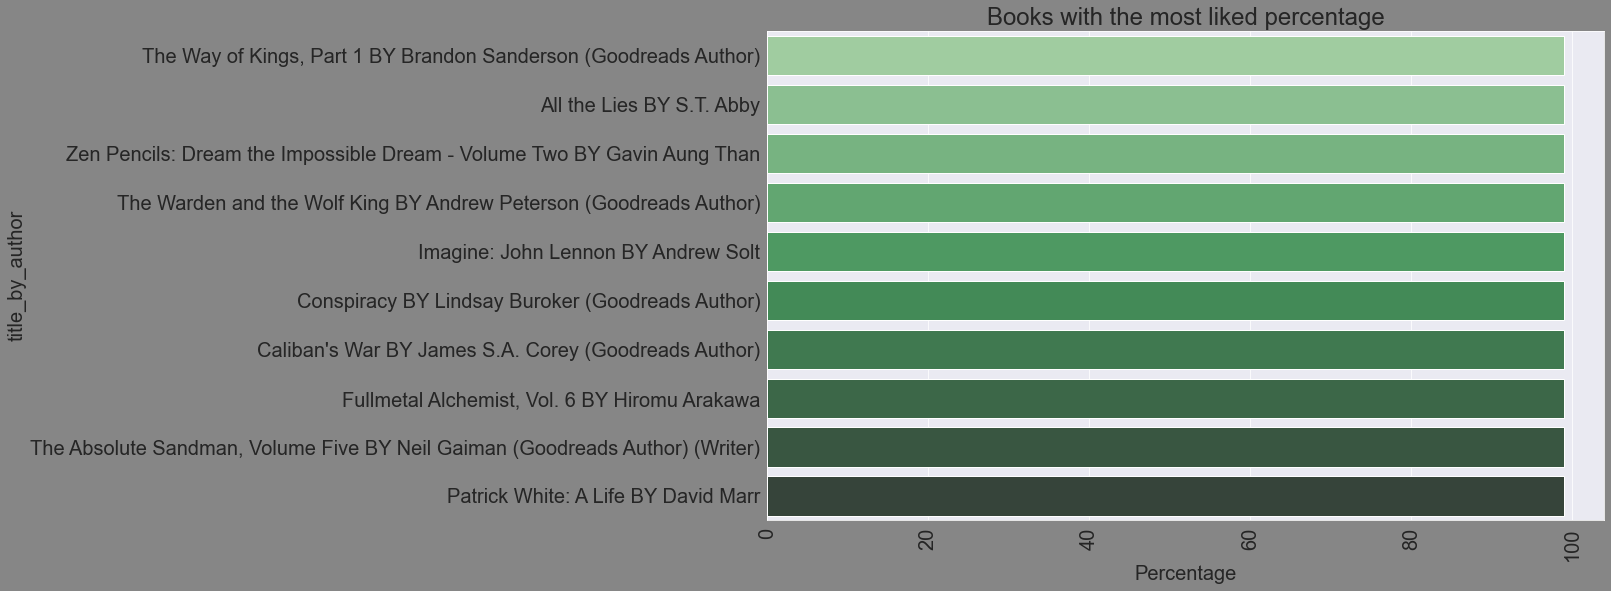

In [20]:
top_percent = list_df.loc[list_df['likedPercent']<100]
top_percent = top_percent.set_index('title_by_author')
top_percent = top_percent.sort_values('likedPercent', ascending = False).head(10)
per_count = top_percent['likedPercent']

plt.figure(figsize = (15,9))
sns.barplot(x= per_count, y= per_count.index, palette="Greens_d")
plt.title('Books with the most liked percentage')
plt.xlabel("Percentage");
plt.xticks(rotation=90);

Actually, all these books have equal liked percentage(99%)

## (iv) Top 5 Genres/Categories in the list:

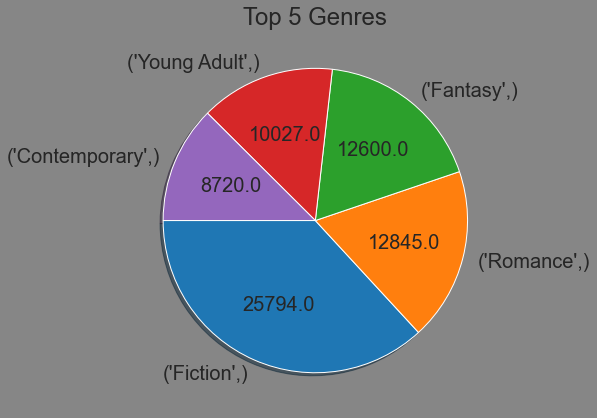

In [22]:
#creating a list of all the genres in the entire dataset:
gen = []
for index, row in list_df.iterrows():
    for r in row[3]:
        gen.append(r)
gen_df = pd.DataFrame(gen, columns = ['Genres'])
gen_count = gen_df.value_counts().head(5) # top 3 genres

#defining a function to calculate absolute value
def absolute_value(val):
    a  = np.round(val/100.*gen_count.sum(), 0)
    return a

#using a piechart to plot teh top 7 genres

plt.figure(figsize=(15,7))
plt.title("Top 5 Genres")
plt.pie(gen_count, labels=gen_count.index, wedgeprops= {'edgecolor':'white'}, autopct=absolute_value, shadow=True, startangle=180);

So it looks like the majority of our books fall under the "Fiction" genre, followed by "Romance", and "Fantasy". However, this does not mean that they are limited to that particular genre/category only; a book can fall under different genres.

### "When I have a little money, I buy books; and if I have any left, I buy food and clothes."
<b>-Erasmus

<b>Now it’s time to take our analysis to the next step. Let’s initialize some preferences and display them using visualizations and calculations.</b>

# 2. Visualization based on different preferences:

<b>For this section, I have prepared numerous lists and categorized them on the basis of genres/categories. I will be using them as preferences to list out books that have received the highest number of goodreads ratings. I will only be using the books that have at least 250 number of ratings, 250 bbe scores, and the ones that have been liked by at least 75% of the readers. Finally, I will plot graphs and display the top 10 books before the year 2000 and those after the year 2000.</b>
I used this listing and categorization method because there were around 1000 different genres, and displaying all those in this static system did not seem feasible. So please note that the books are not limited to one particular genre, and you can refer to the keywords I have listed to see if it matches the genres/category you are looking for. For example: I have listed the book "Harry Potter" under my list of Fiction genre, but it also falls under other genres like High Fantasy, Adult Fiction, Magic, etc.



In [67]:
#list of different genres
fiction_genre = ['Fiction', 'Fantasy', 'Urban Fantasy', 'Realistic Fiction', 'Lds Fiction', 'American Fiction', 'High Fantasy', 'Adult Fiction', 'Adolescence', 'Fan Fiction', 'Novels', 'Faith',  'Recreation', 'Epic Fantasy']
self_genre= ['Self Help', 'Taoism']
thrill_genre = ['Thriller', 'Paranormal Mystery', 'Mystery Thriller', 'Detective', 'Adventure', 'Psychological Thriller', 'Suspense']
romance_genre = ['Romance', 'Historical Romance', 'Time Travel Romance', 'Erotic Historical Romance', 'Category Romance', 'Victorian Romance', 'Love', 'Contemporary Romance', 'M F Romance']
war_genre = ['Action', 'Civil War', 'War', 'World War II', 'Soldiers']
tech_genre = ['Personal Finance', 'Taxation', 'Banking', 'Programming', 'Software', 'Coding', 'Internet','Computer Science', 'Business', 'Technology']
magic_genre =['Magic', 'Supernatural', 'Magical Realism', 'High Fantasy', 'Wizards', 'Epic Fantasy', 'Fairy Tale', 'Quest', 'Fantasy Fiction', 'Vampires']
env_genre =['Global Warming', 'Climate Change Fiction', 'Environment', 'Sustainability']
health_genre = ['Health', 'Psychiatry', 'Psychology']
politics_genre =['International Relations', 'Politics']
comedy_genre =['Comics', 'Jokes', 'Comedy', 'Humor']
literature_genre = ['Literature']
horror_genre =['Erotic Horror', 'Ghost Stories', 'Horror']
nonfiction_genre = ['Logic', 'Philosophy','Nonfiction']
erotic_genre =['Erotica', 'Erotic Historical Romance', 'Erotic Paranormal Romance']            
science_genre =['Science Fiction']



#function to return indices of records based on genres
def genre_based_df(dataframe, genre_list):
    ind = []
    for index, row in dataframe.iterrows():
        for x in genre_list:
            if x in row.genre:
                ind.append(index)
                break
            else:
                continue
    return ind

#function to get data before 2000:
def bef_gen(dataframe, genre_list):
    indx = genre_based_df(dataframe, genre_list)
    indf = dataframe.iloc[indx]
    indf.set_index('publishDate', inplace= True)
    indf = indf.sort_index()
    Bindf = indf[: '1999']
    Bindf = Bindf[(Bindf['rating'] > 3.5) & (Bindf['likedPercent'] > 75) & (Bindf['numRatings'] > 250) & (Bindf['bbeScore'] > 250)]
    return Bindf

#function to get data after 2000:
def aft_gen(dataframe, genre_list):
    indx = genre_based_df(dataframe, genre_list)
    indf = dataframe.iloc[indx]
    indf.set_index('publishDate', inplace= True)
    indf = indf.sort_index()
    Aindf = indf['2000' :]
    Aindf = Aindf[(Aindf['rating'] > 3.2) & (Aindf['likedPercent'] > 75) & (Aindf['numRatings'] > 250) & (Aindf['bbeScore'] > 250)]
    return Aindf

#function to display the required graphs for each genre
def bef_aft_graph(bdf,adf):
    fig, axes = plt.subplots(2, 1, figsize=(25, 20));
    fig.suptitle('BOOKS WITH THE HIGHEST RATINGS:',fontweight='bold', fontsize= 25);
   
    
    # Before
    sns.barplot(ax=axes[0], x=bdf, y=bdf.index, palette = 'mako');
    axes[0].set_title('Books BEFORE 2000:',fontdict= { 'fontsize': 24, 'fontweight':'bold'});
    axes[0].set_xlabel('Ratings',fontsize = 15);
    axes[0].set_ylabel('Book Title',fontsize = 15);

    #After
    sns.barplot(ax=axes[1], x=adf, y=adf.index, palette = 'rocket');
    axes[1].set_title('Books AFTER 2000:',fontdict= { 'fontsize': 24, 'fontweight':'bold'});
    axes[1].set_xlabel('Ratings',fontsize = 15);
    axes[1].set_ylabel('Book Title & Author',fontsize = 15);
    
    plt.tight_layout(pad=5);

## 1. Fiction and Fantasy:
### Keywords:
'Fiction', 'Fantasy', 'Urban Fantasy', 'Realistic Fiction', 'Lds Fiction', 'American Fiction', 'High Fantasy', 'Adult Fiction', 'Adolescence', 'Fan Fiction', 'Novels', 'Faith',  'Recreation', 'Epic Fantasy'

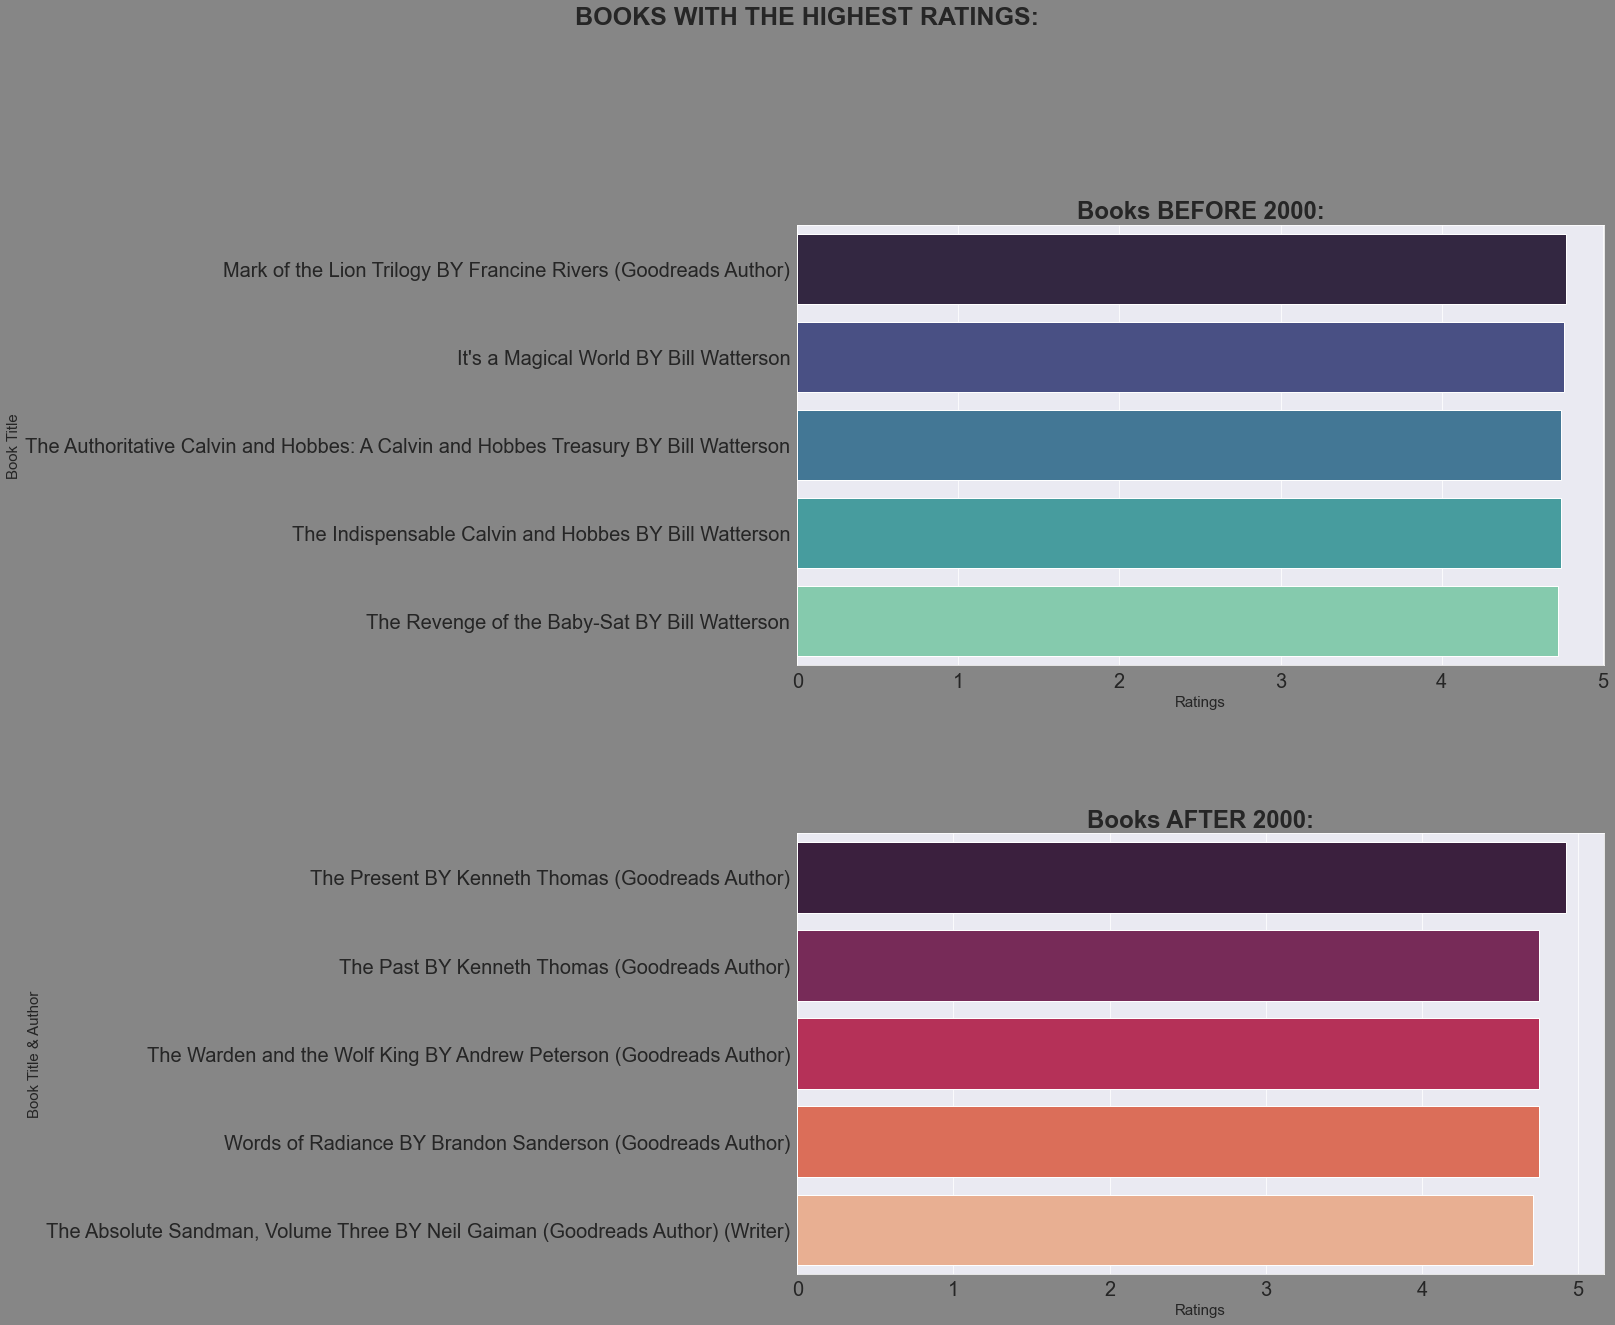

In [24]:
Bffiction_df = bef_gen(list_df, fiction_genre)
Affiction_df = aft_gen(list_df, fiction_genre)

req_Bf_df = Bffiction_df.sort_values('rating', ascending = False).head(5).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Affiction_df.sort_values('rating', ascending = False).head(5).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 2. Self Help:
<b>Keywords:</b>
'Self Help', 'Taoism'

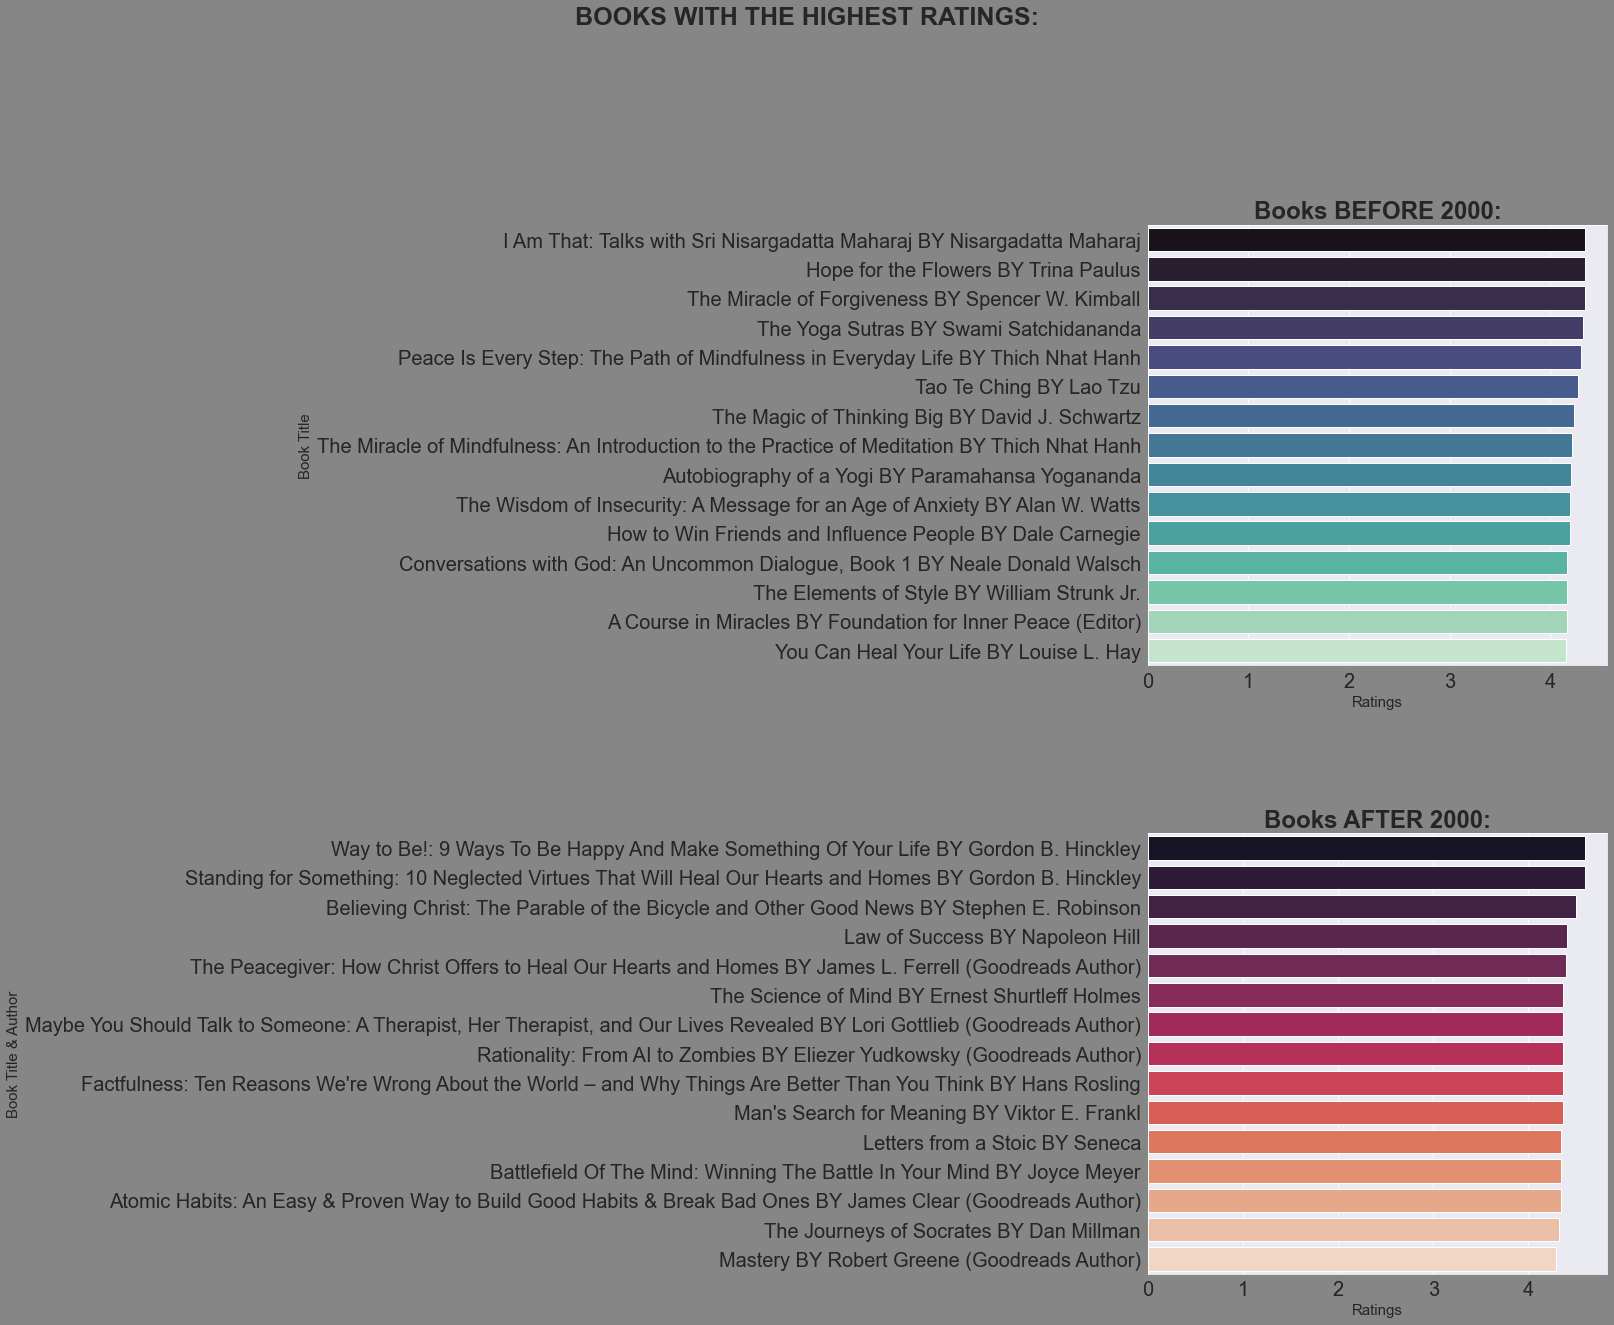

In [40]:
Bfself_df = bef_gen(list_df, self_genre)
Afself_df = aft_gen(list_df, self_genre)

req_Bf_df = Bfself_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afself_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 3. Thrill and Adventure:
<b>Keywords:</b>
'Thriller', 'Paranormal Mystery', 'Mystery Thriller', 'Detective', 'Adventure', 'Psychological Thriller', 'Suspense'

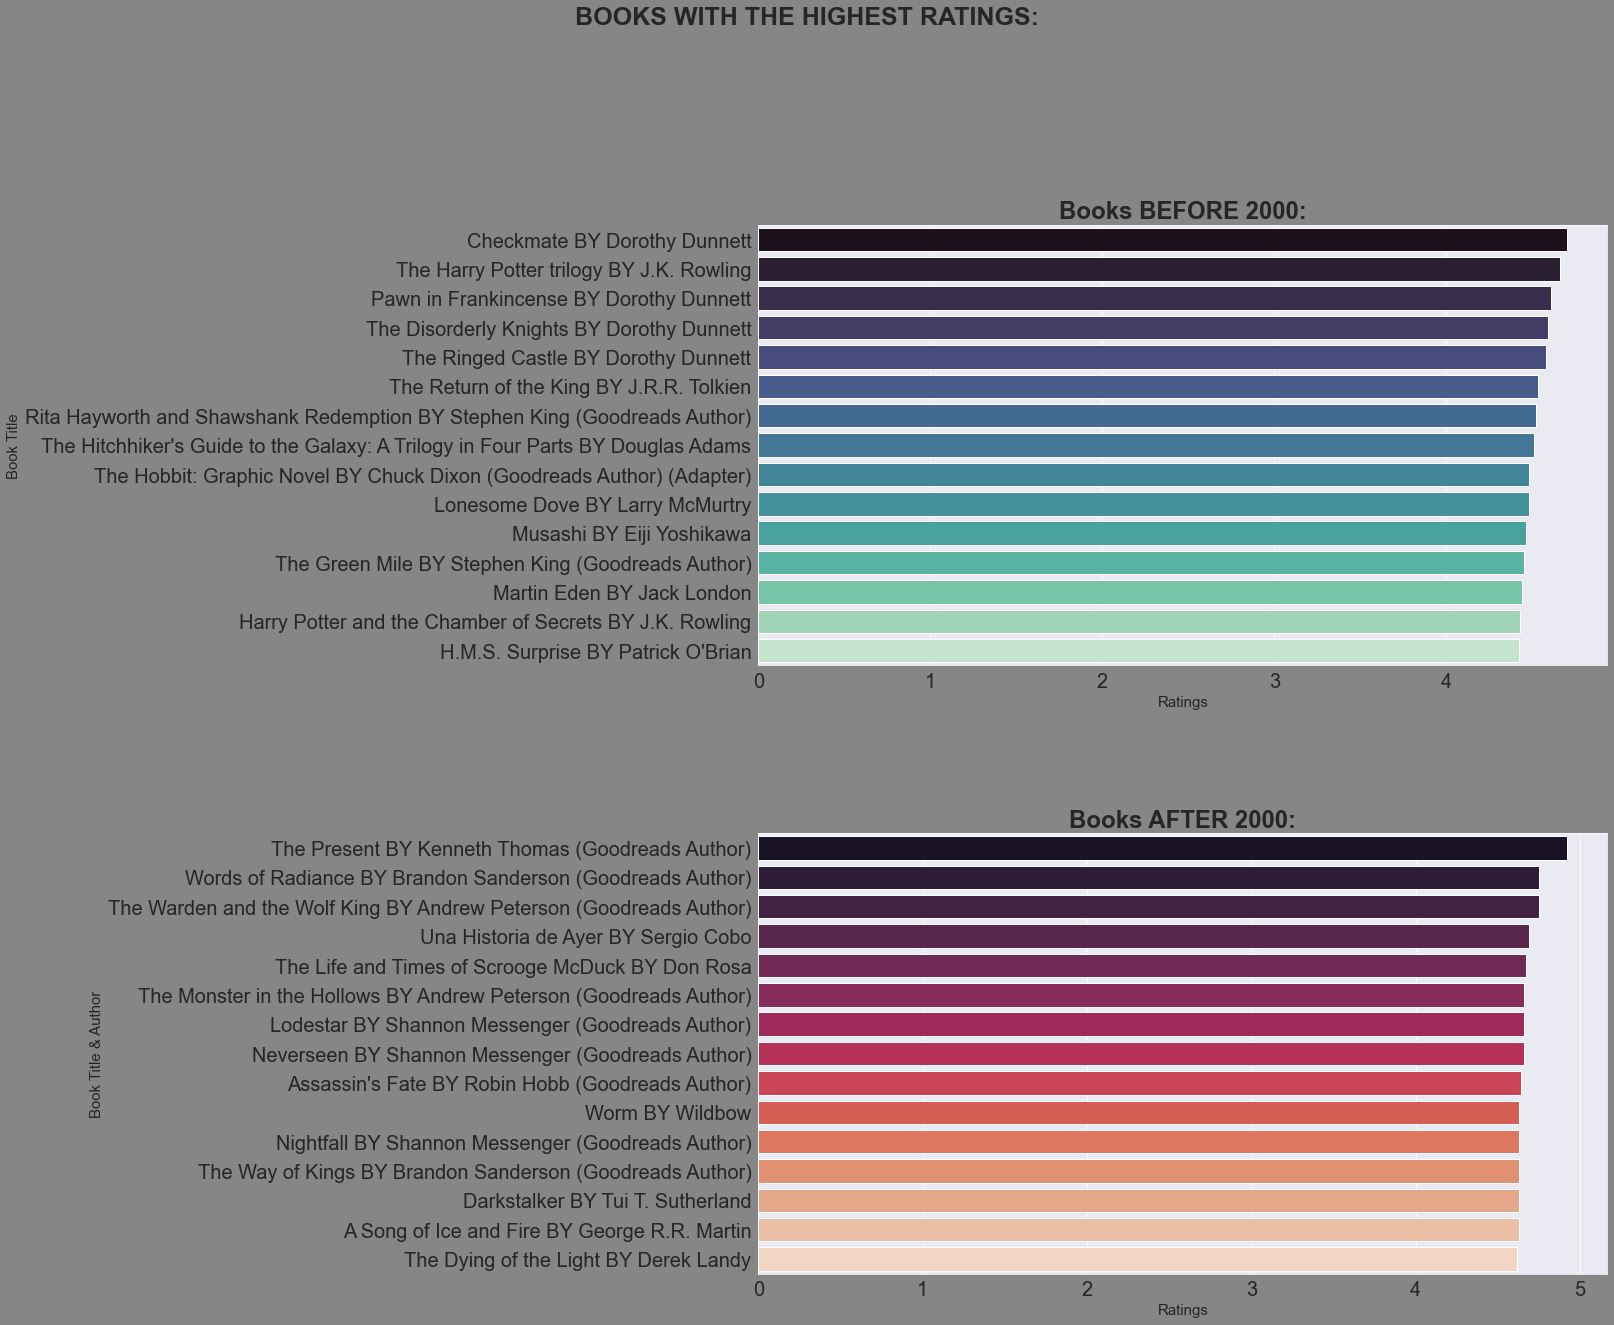

In [41]:
Bfthrill_df = bef_gen(list_df, thrill_genre)
Afthrill_df = aft_gen(list_df, thrill_genre)

req_Bf_df = Bfthrill_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afthrill_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

### "For some of us, books are as important as almost anything else on earth. What a miracle it is that out of these small, flat, rigid squares of paper unfolds world after world after world, worlds that sing to you, comfort and quiet or excite you. Books help us understand who we are and how we are to behave. They show us what community and friendship mean; they show us how to live and die."
<b>-Anne Lamott

## 4. Love and Romance

<b>Keywords:</b>
'Romance', 'Historical Romance', 'Time Travel Romance', 'Erotic Historical Romance', 'Category Romance', 'Erotica', 'Victorian Romance', 'Love', 'Contemporary Romance', 'M F Romance'

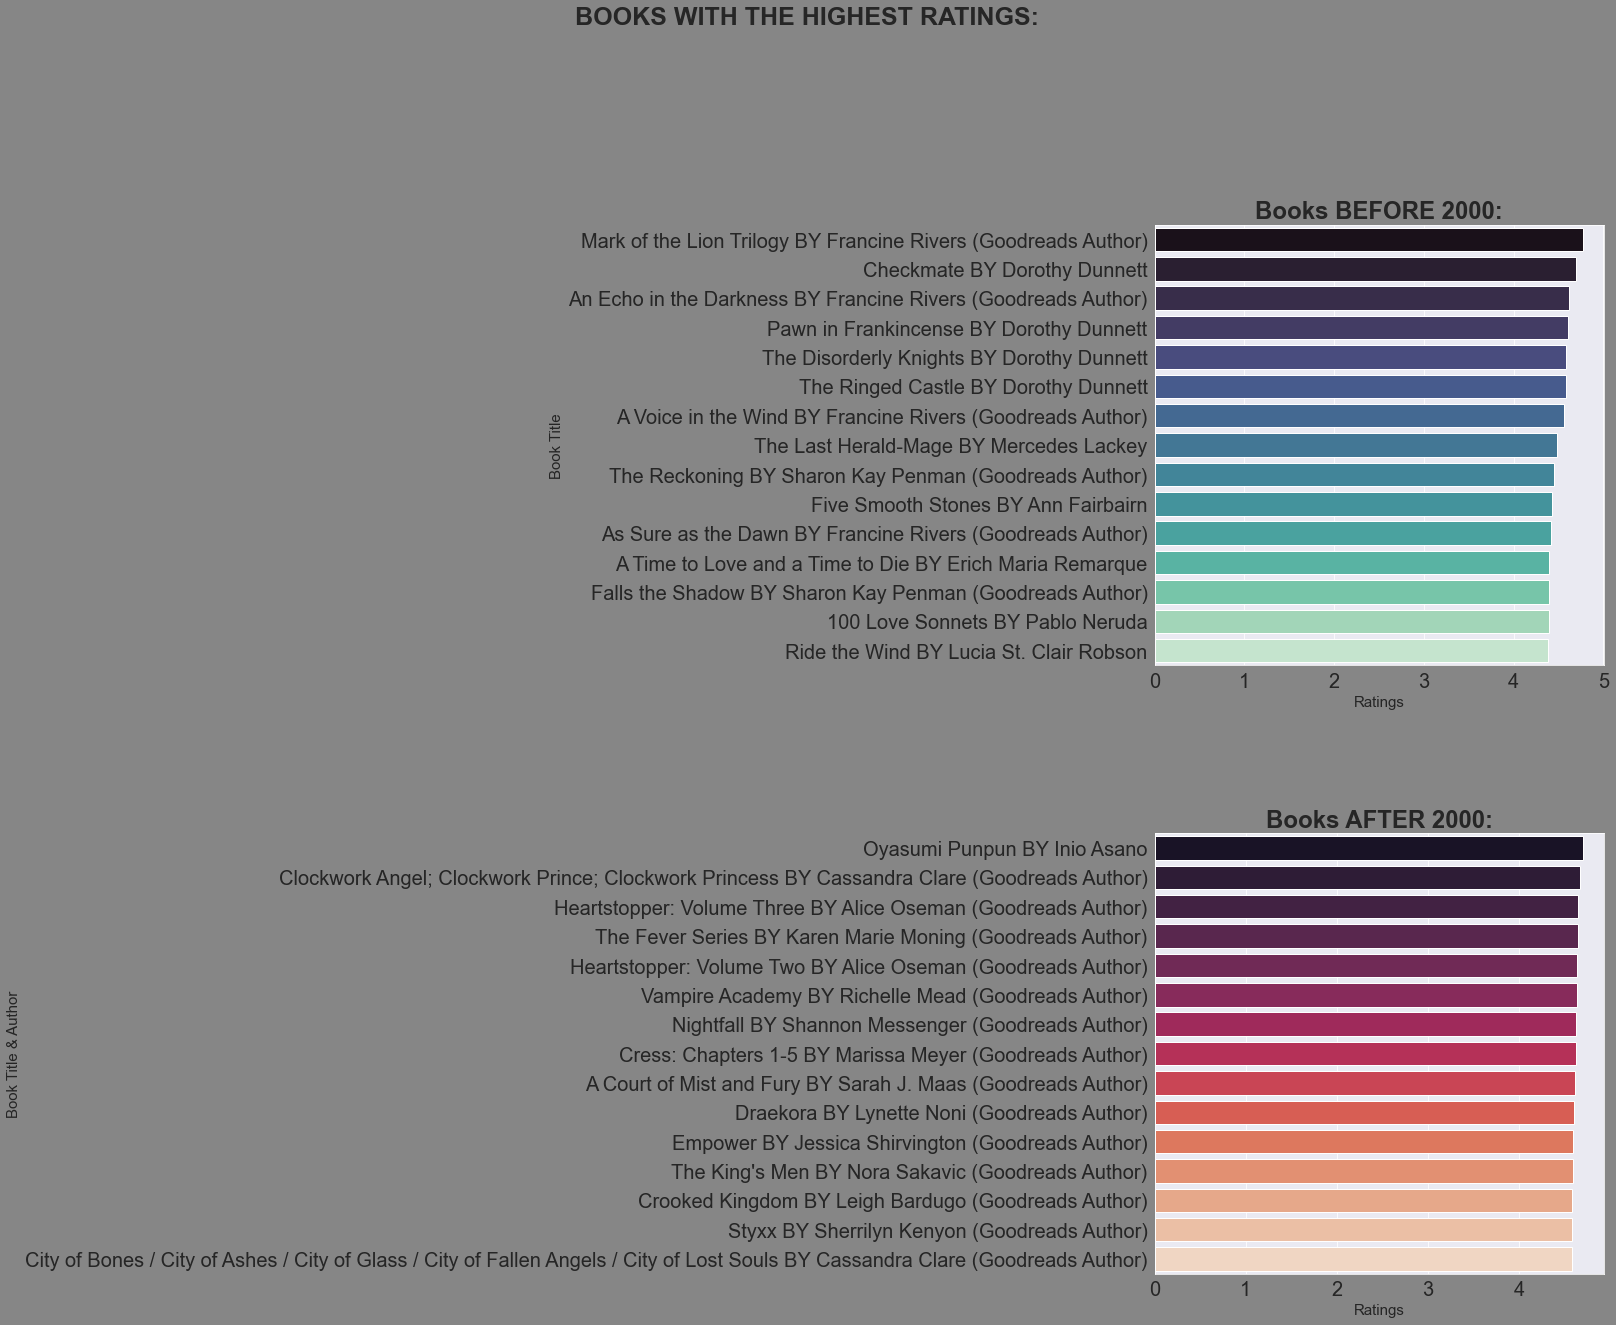

In [42]:
Bfromance_df = bef_gen(list_df, romance_genre)
Afromance_df = aft_gen(list_df, romance_genre)

req_Bf_df = Bfromance_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afromance_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 5. War

<b>Keywords:</b>
'Action', 'Civil War', 'War', 'World War II', 'Soldiers'

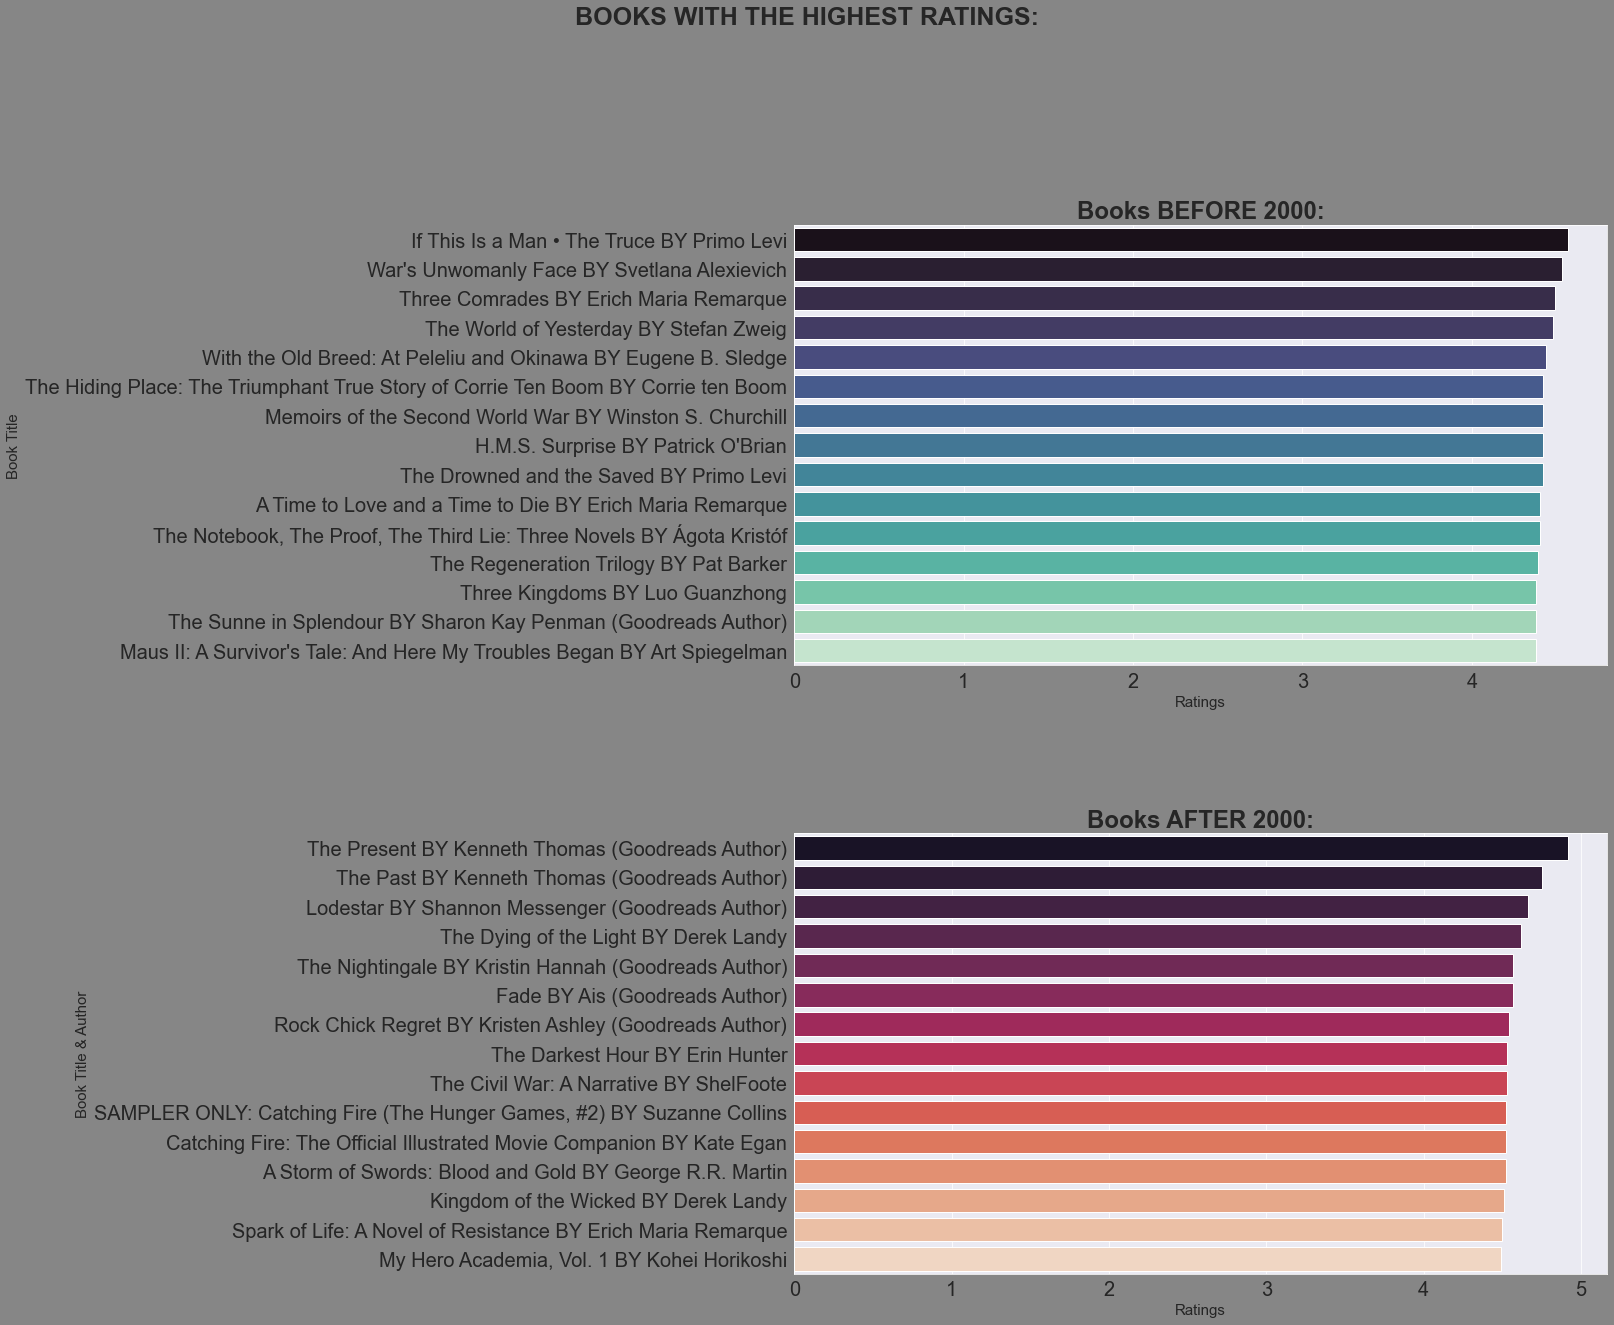

In [43]:
Bfwar_df = bef_gen(list_df, war_genre)
Afwar_df = aft_gen(list_df, war_genre)

req_Bf_df = Bfwar_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afwar_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 6. Business and Technology:

<b> Keywords:</b>
'Personal Finance', 'Taxation', 'Banking', 'Programming', 'Software', 'Coding', 'Internet','Computer Science', 'Business', 'Technology'

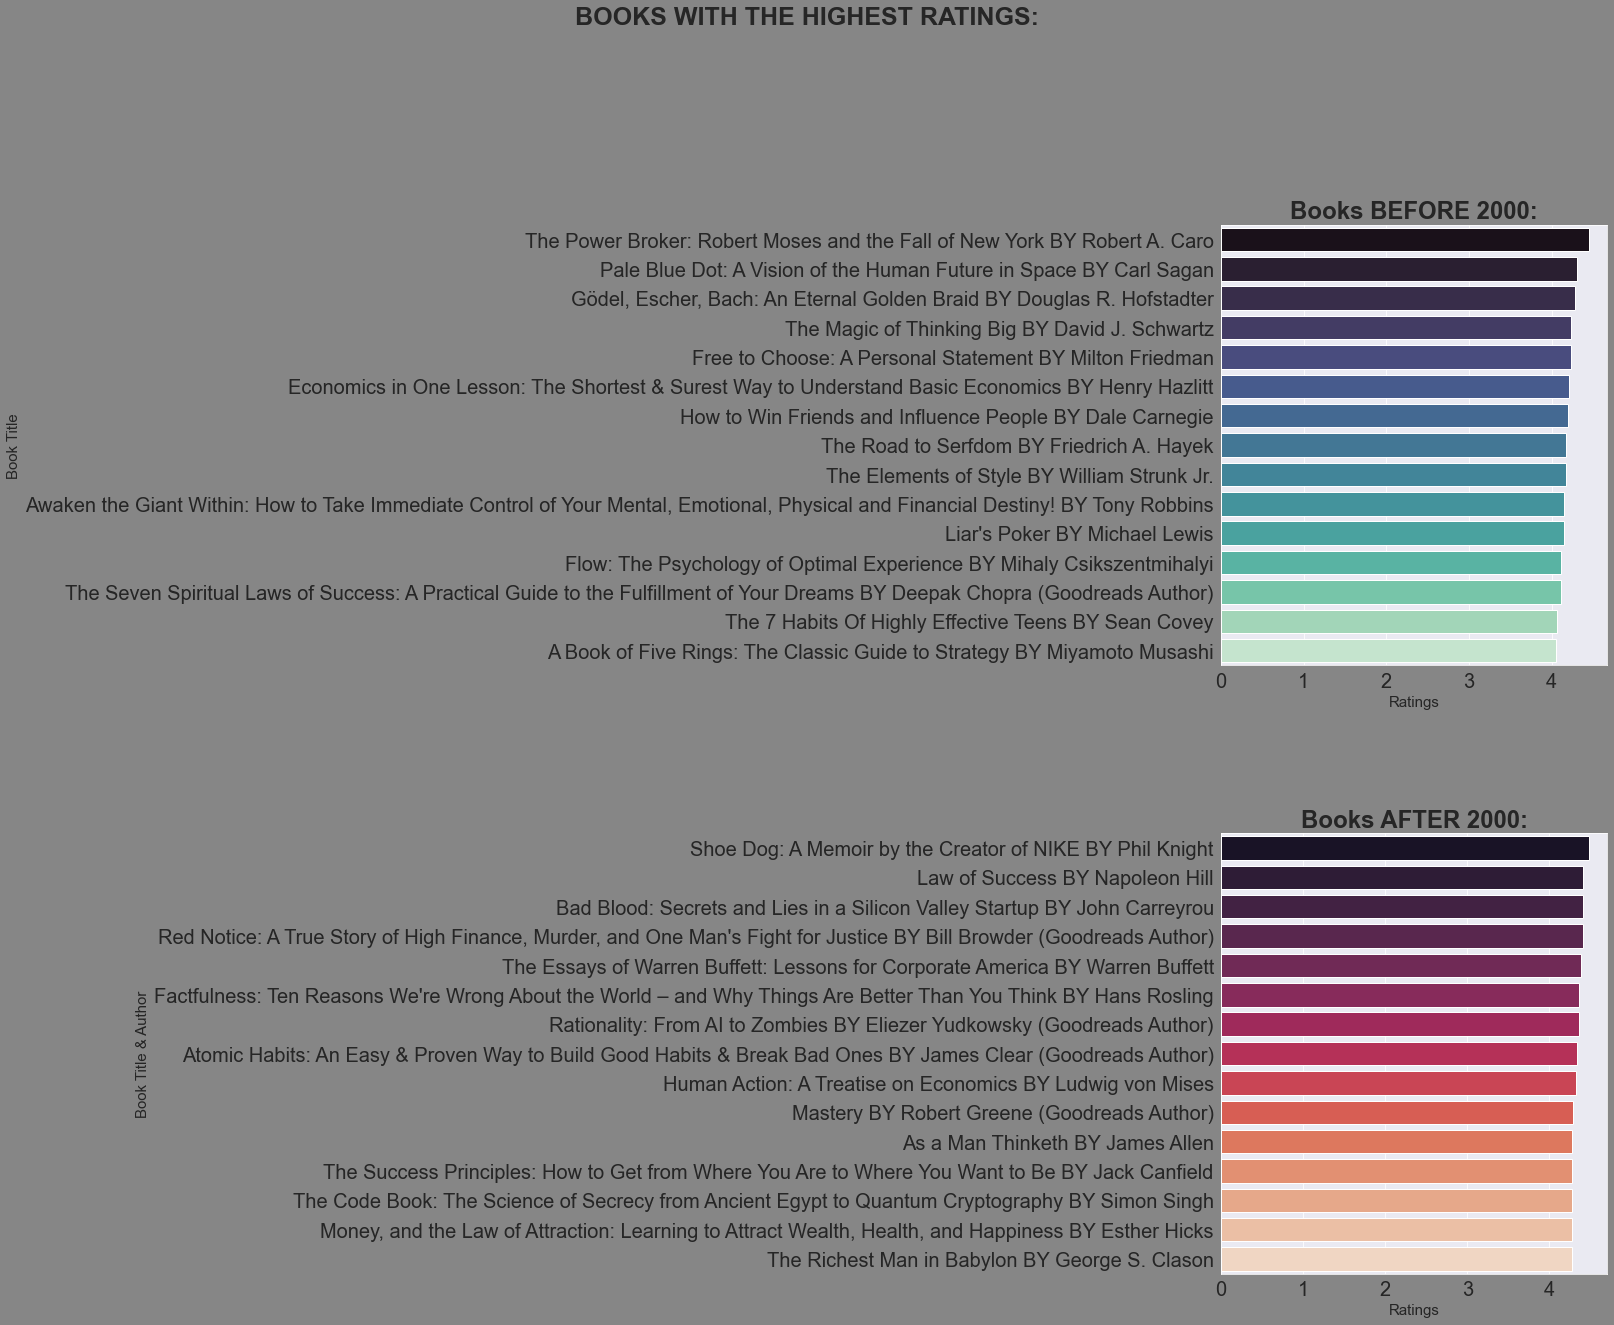

In [44]:
Bftech_df = bef_gen(list_df, tech_genre)
Aftech_df = aft_gen(list_df, tech_genre)

req_Bf_df = Bftech_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Aftech_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

### “I do believe something very magical can happen when you read a book.”
<b>-J.K. Rowling

## 7. Magic and Supernatural:

<b>Keywords:</b>

'Magic', 'Supernatural', 'Magical Realism', 'High Fantasy', 'Wizards', 'Epic Fantasy', 'Fairy Tale', 'Quest', 'Fantasy Fiction', 'Vampires'

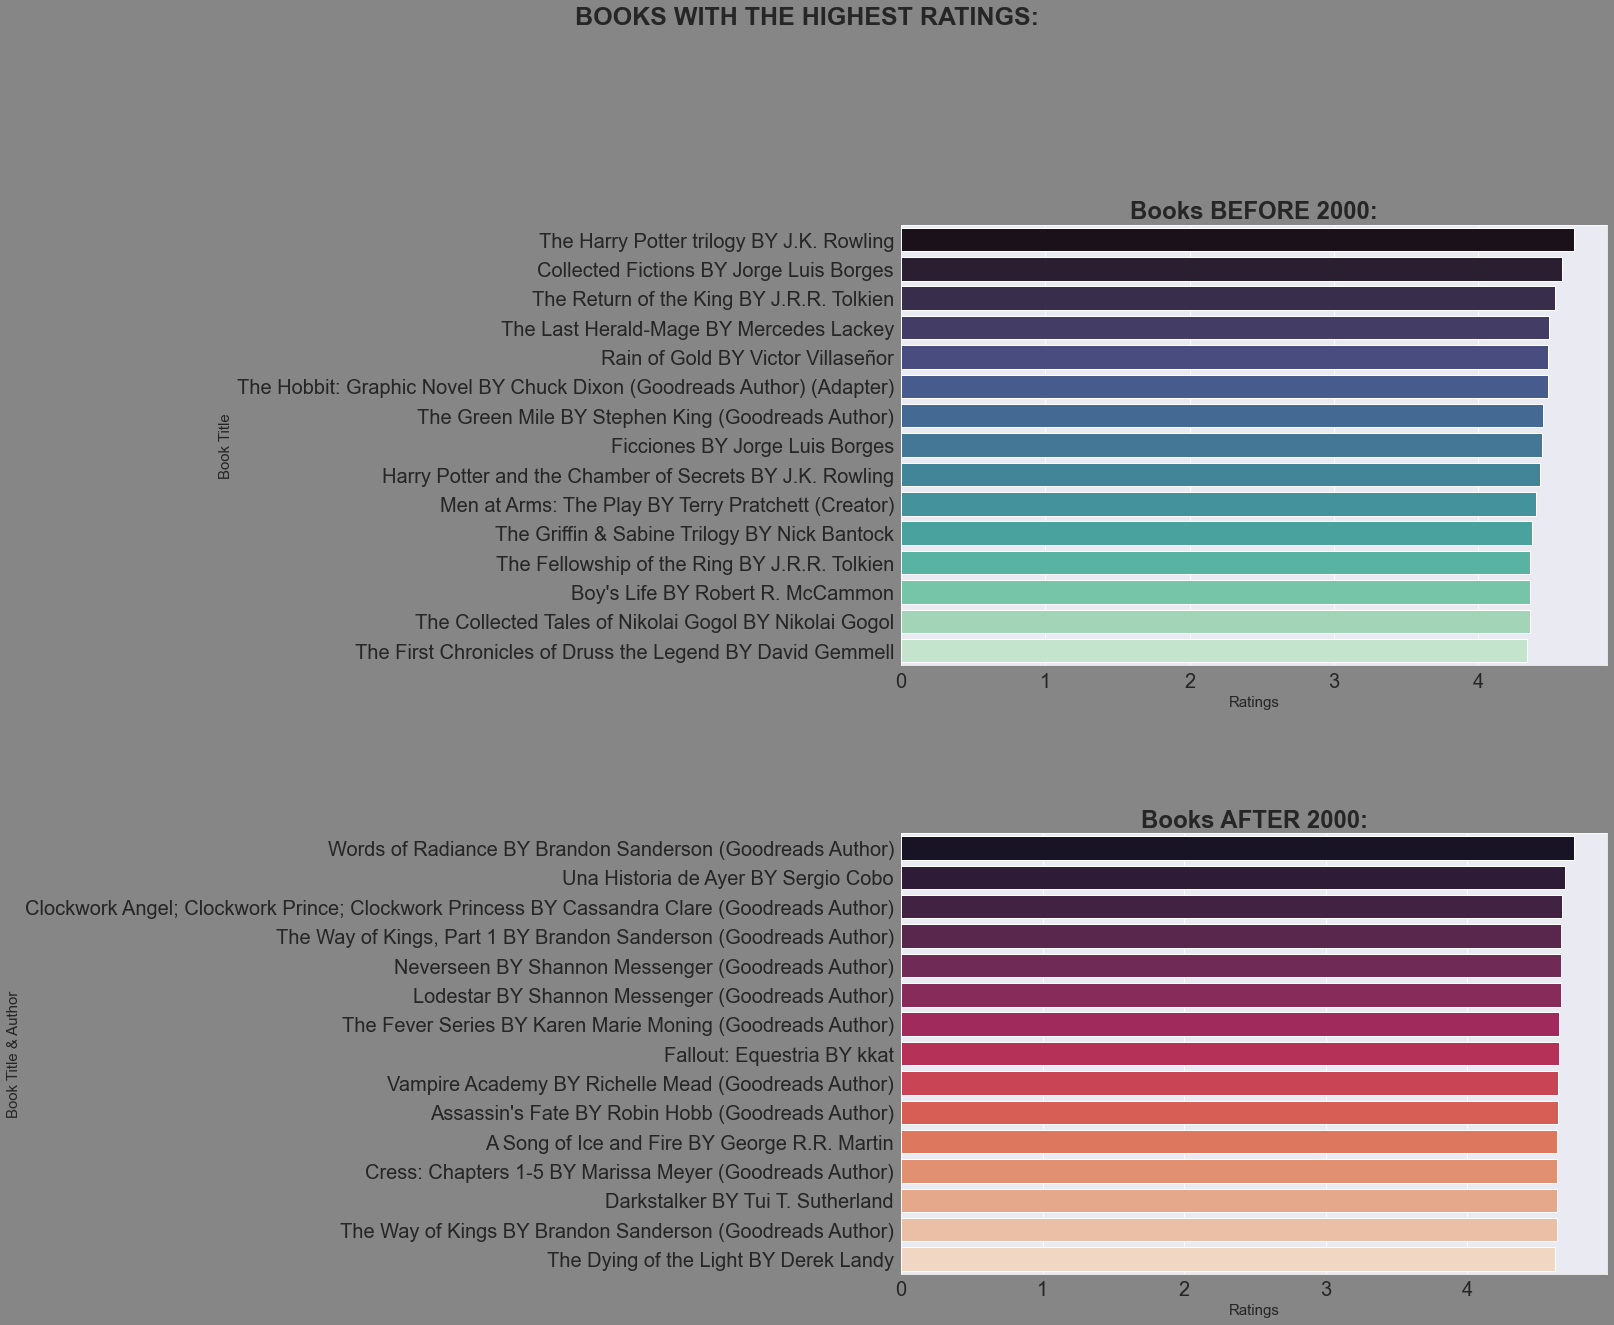

In [45]:
Bfmagic_df = bef_gen(list_df, magic_genre)
Afmagic_df = aft_gen(list_df, magic_genre)

req_Bf_df = Bfmagic_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afmagic_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 8. Environment:

<b>Keywords:</b>
'Global Warming', 'Climate Change Fiction', 'Environment', 'Sustainability'


<ipython-input-49-13082569de5a>:50: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Aindf = indf['2000' :]


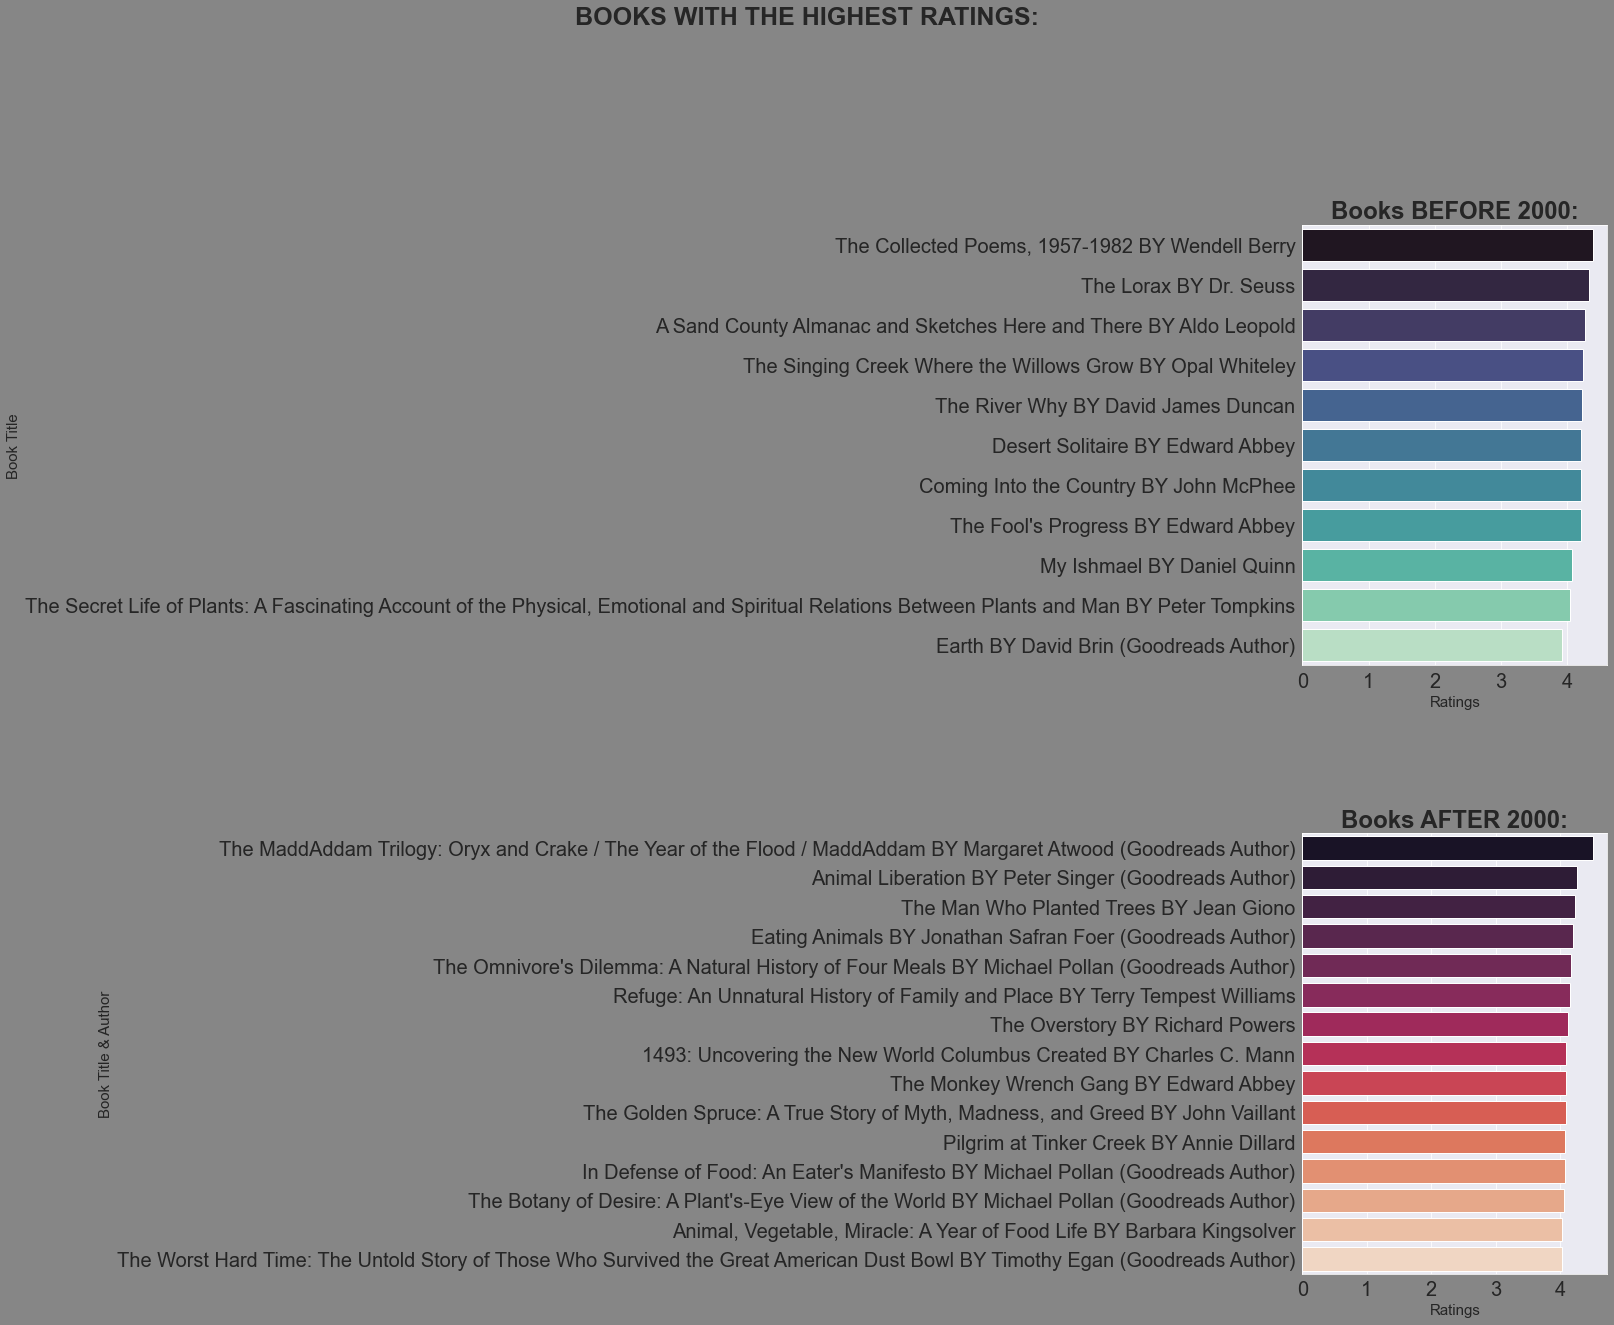

In [50]:
Bfenv_df = bef_gen(list_df, env_genre)
Afenv_df = aft_gen(list_df, env_genre)

req_Bf_df = Bfenv_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afenv_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 9. Health and Psychology

<b>Keywords:</b>
'Health', 'Psychiatry', 'Psychology'

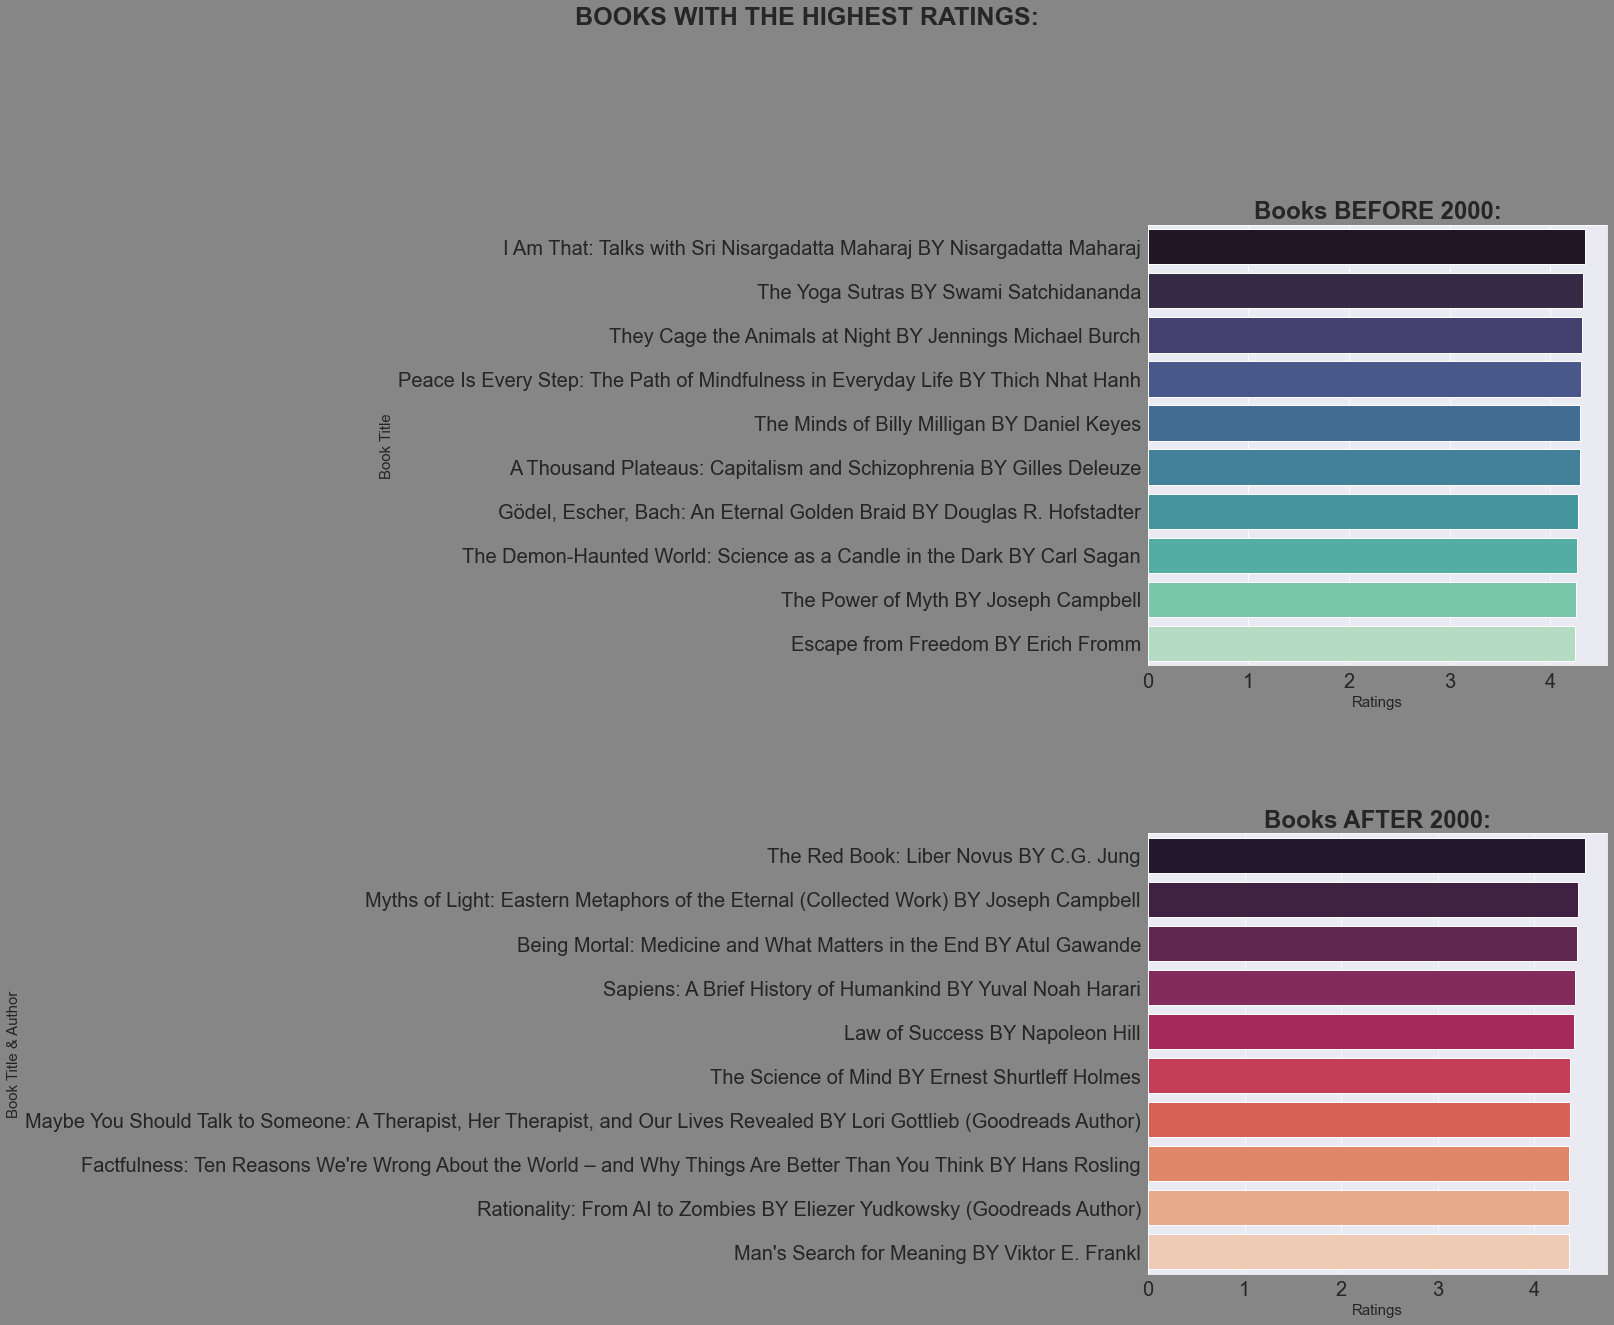

In [51]:
Bfhealth_df = bef_gen(list_df, health_genre)
Afhealth_df = aft_gen(list_df, health_genre)

req_Bf_df = Bfhealth_df.sort_values('rating', ascending = False).head(10).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afhealth_df.sort_values('rating', ascending = False).head(10).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

### "A book is a version of the world. If you do not like it, ignore it; or offer your own version in return."
<b>-Salman Rushdie

## 10. Politics and International Relations:

<b>Keywords:</b>
'International Relations', 'Politics'

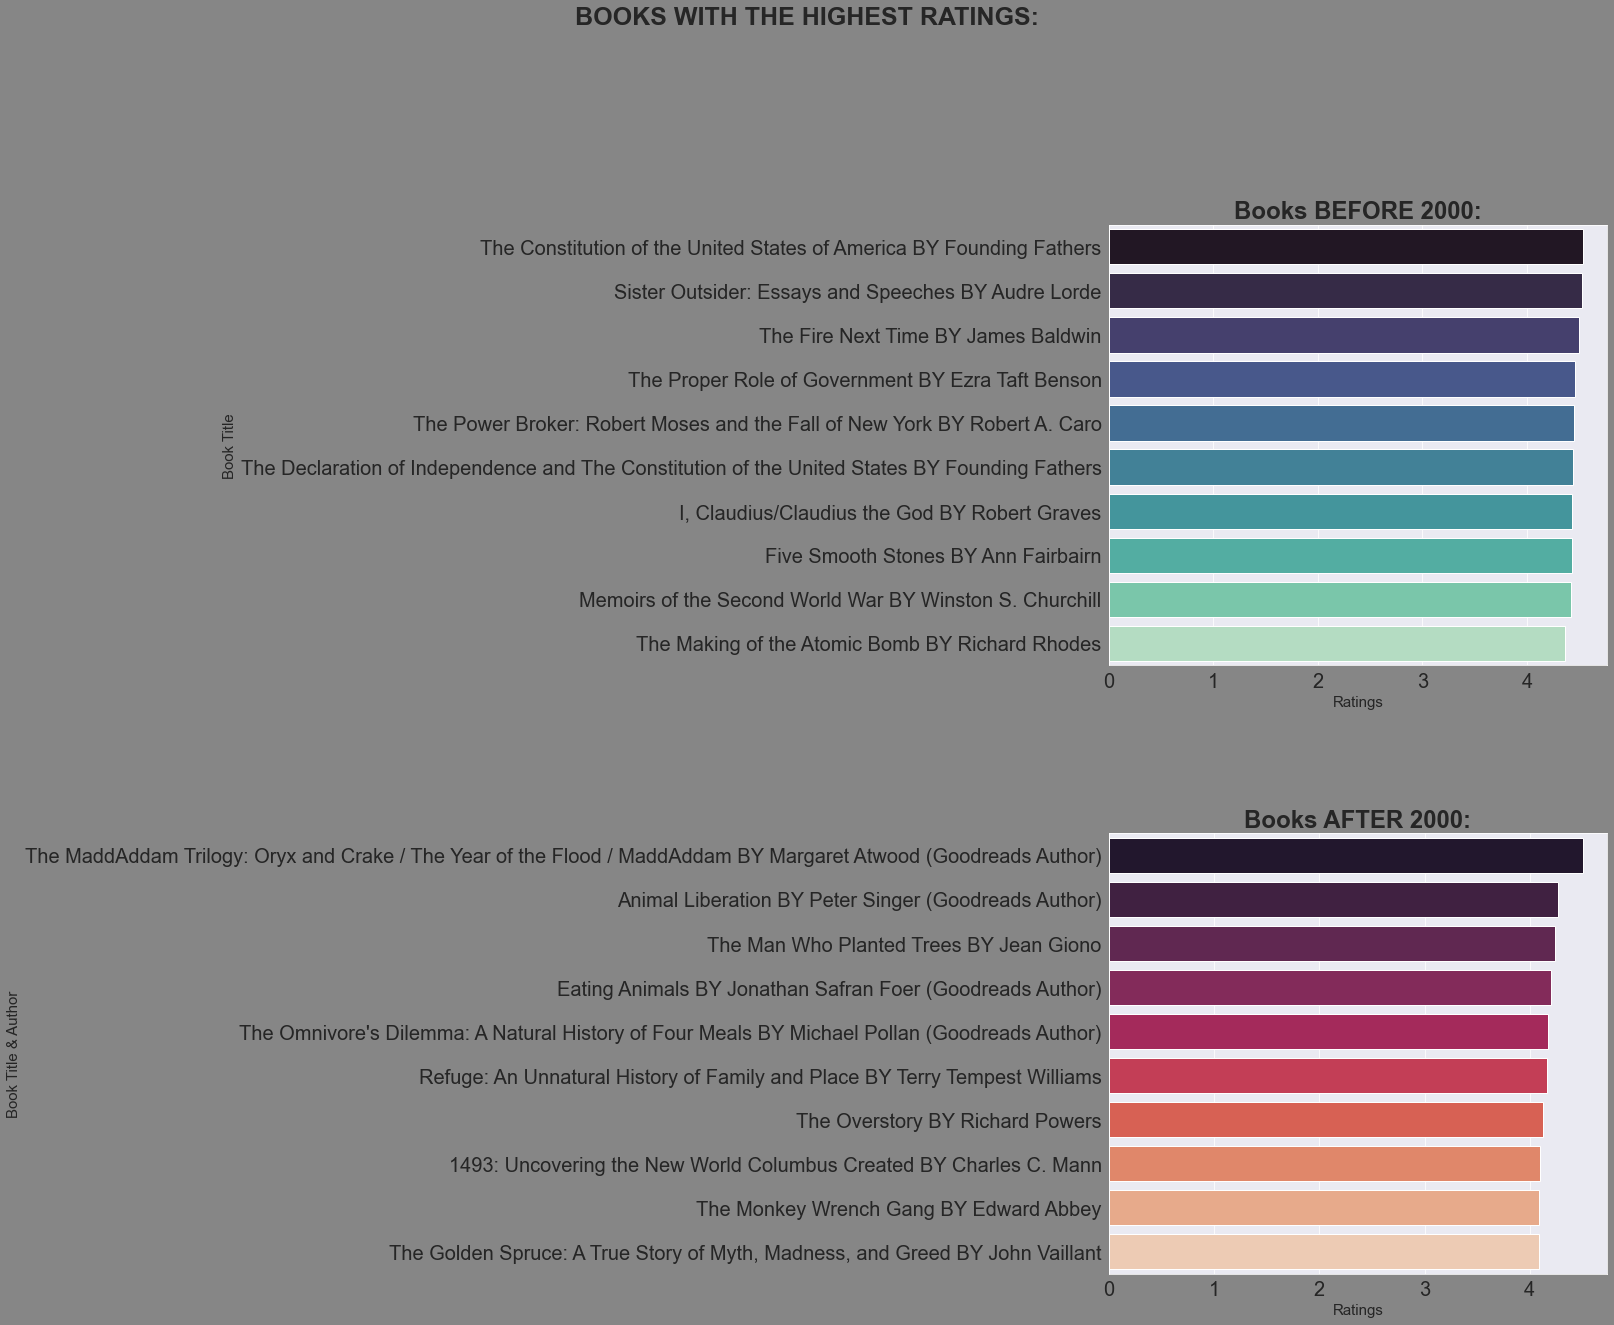

In [56]:
Bfpolitics_df = bef_gen(list_df, politics_genre)
Afpolitics_df = aft_gen(list_df, politics_genre)

req_Bf_df = Bfpolitics_df.sort_values('rating', ascending = False).head(10).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afenv_df.sort_values('rating', ascending = False).head(10).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 11. Humor

<b>Keywords:</b>
'Comics', 'Jokes', 'Comedy', 'Humor'

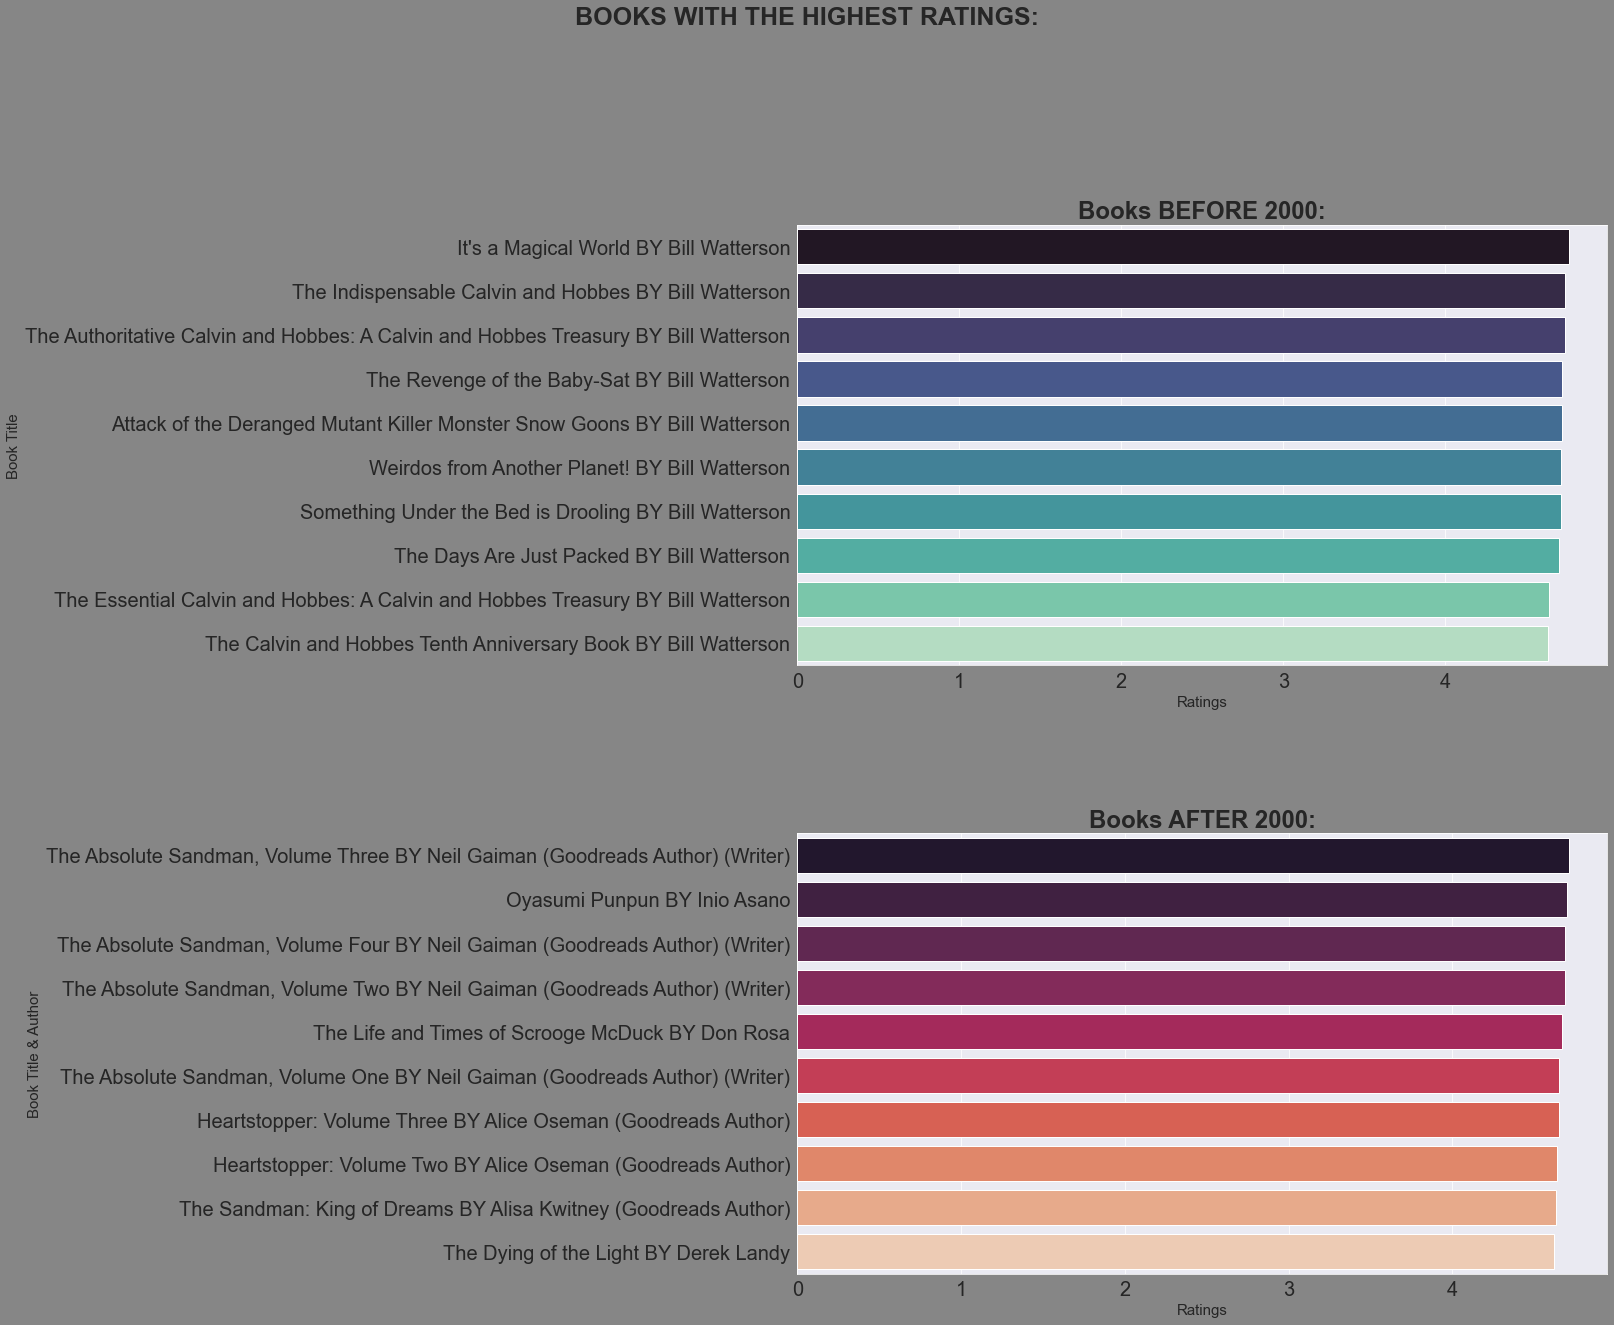

In [57]:
Bfcomedy_df = bef_gen(list_df, comedy_genre)
Afcomedy_df = aft_gen(list_df, comedy_genre)

req_Bf_df = Bfcomedy_df.sort_values('rating', ascending = False).head(10).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afcomedy_df.sort_values('rating', ascending = False).head(10).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 12. Literature

<b>Keywords:</b>
'Literature'

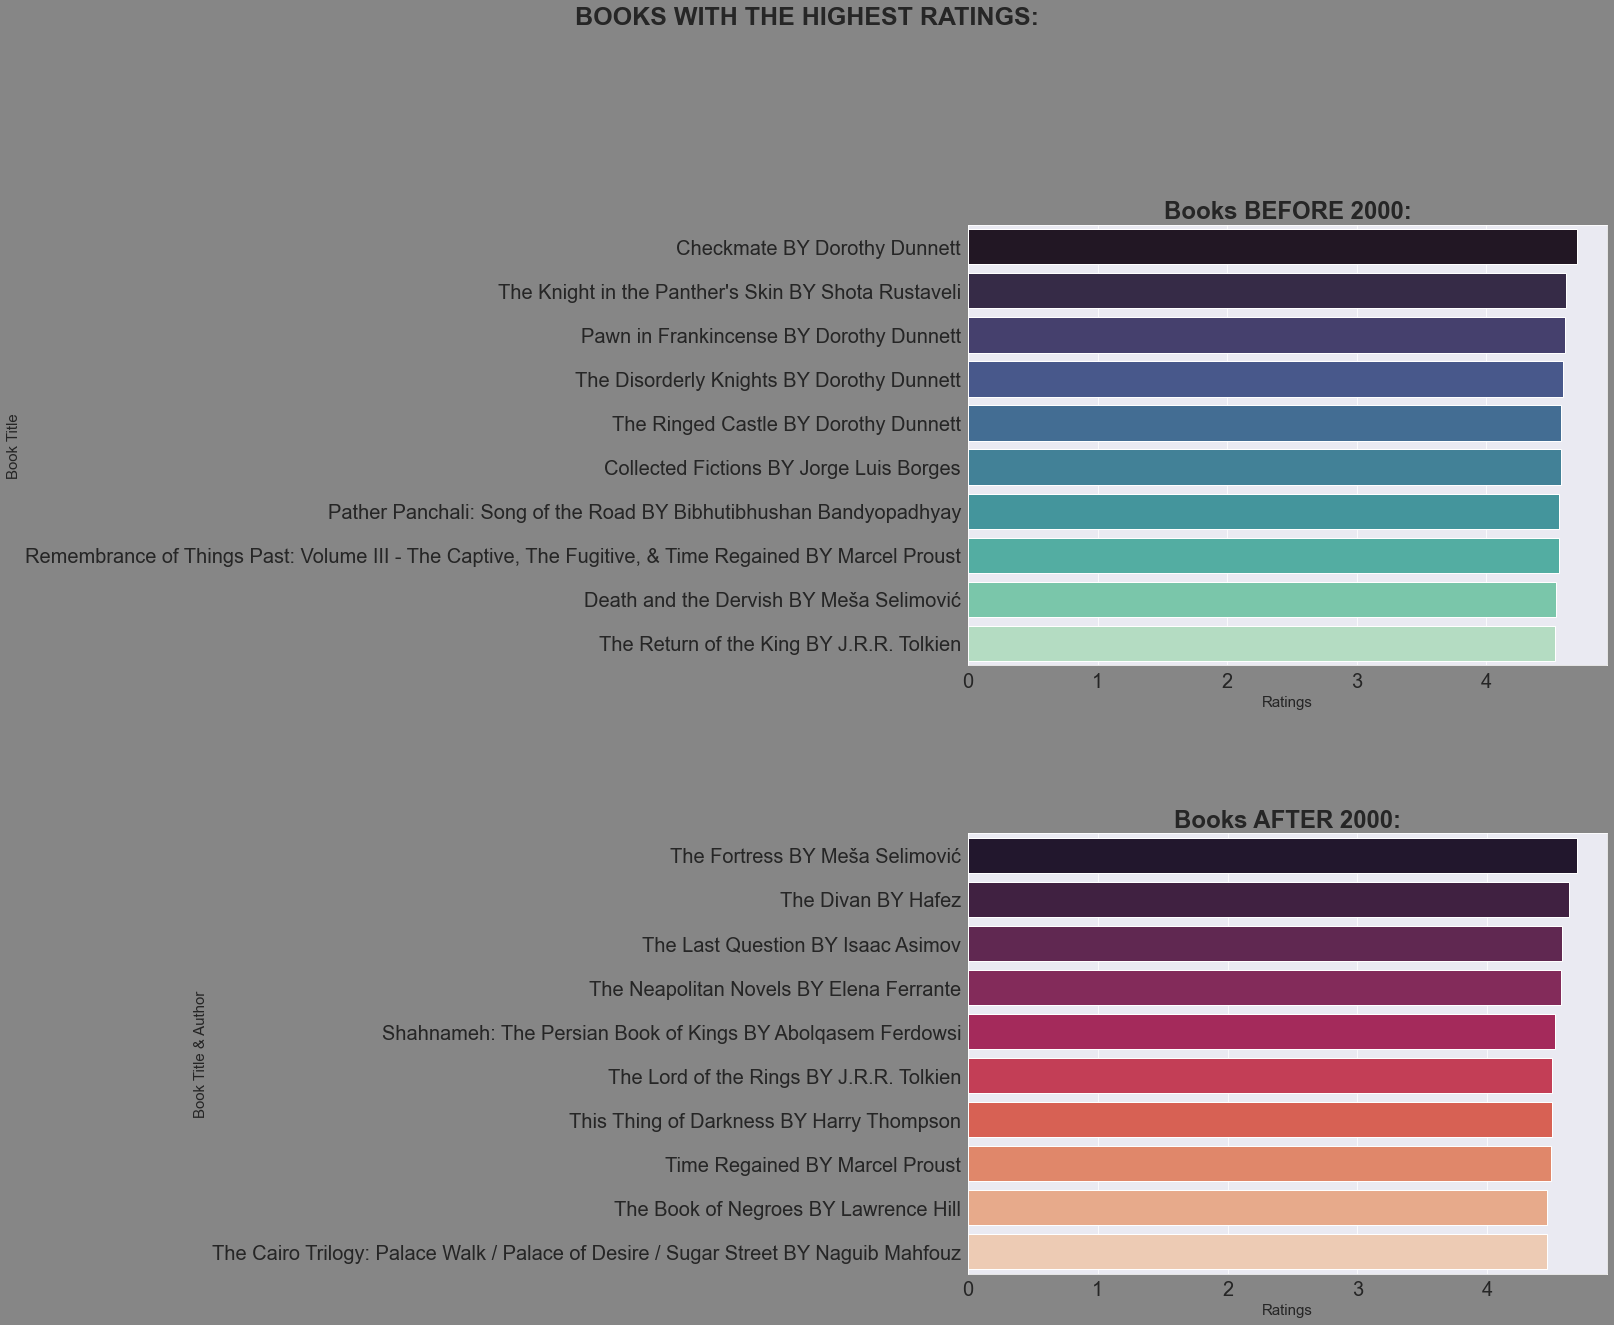

In [61]:
Bfliterature_df = bef_gen(list_df, literature_genre)
Afliterature_df = aft_gen(list_df, literature_genre)

req_Bf_df = Bfliterature_df.sort_values('rating', ascending = False).head(10).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afliterature_df.sort_values('rating', ascending = False).head(10).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

### "One glance at a book and you hear the voice of another person, perhaps someone dead for 1,000 years. To read is to voyage through time."
<b>-Carl Sagan

## 13. Horror:

<b>Keywords:</b>

'Erotic Horror', 'Ghost Stories', 'Horror'

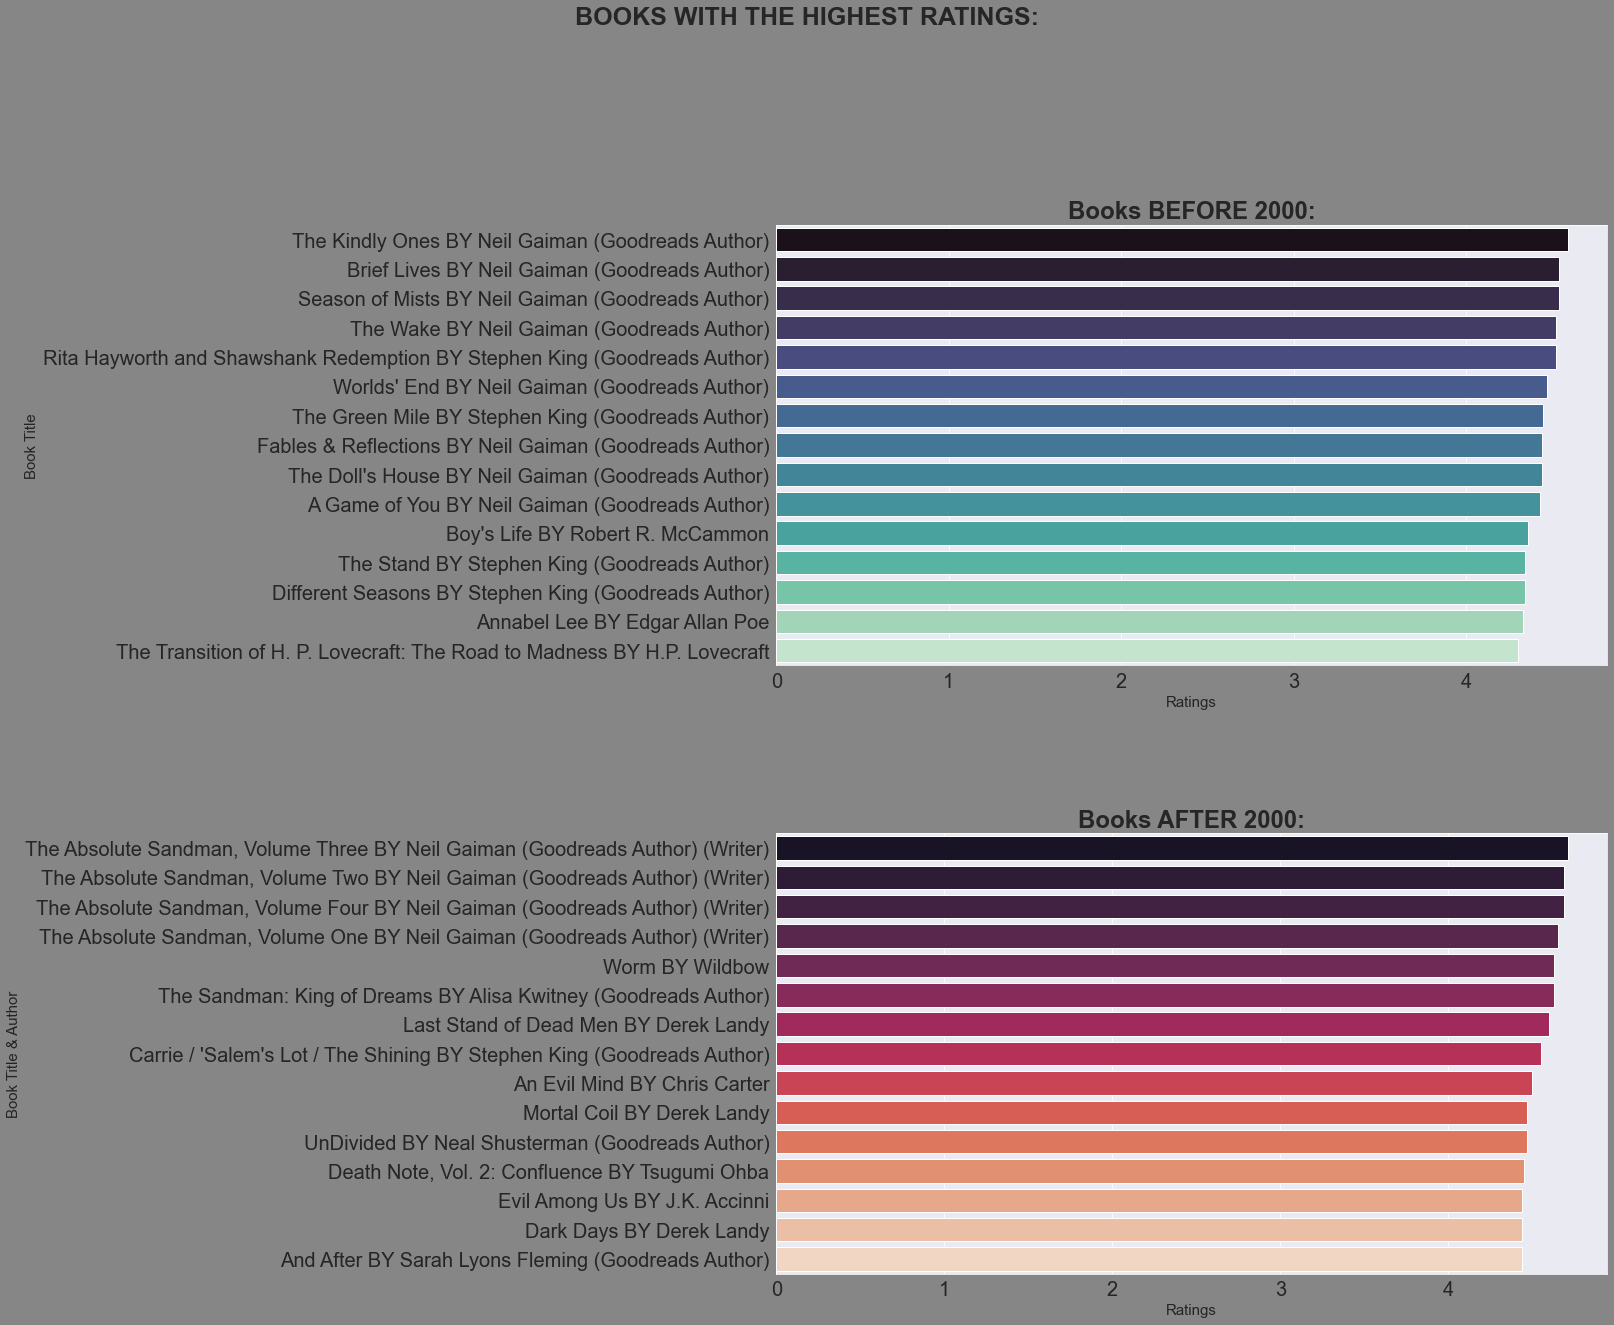

In [63]:
Bfhorror_df = bef_gen(list_df, horror_genre)
Afhorror_df = aft_gen(list_df, horror_genre)

req_Bf_df = Bfhorror_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afhorror_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

<b> "So many books, so little time"- I think this is the real horror.

## 14. Nonfiction:

<b>Keywords:</b>
'Logic', 'Philosophy','Nonfiction'

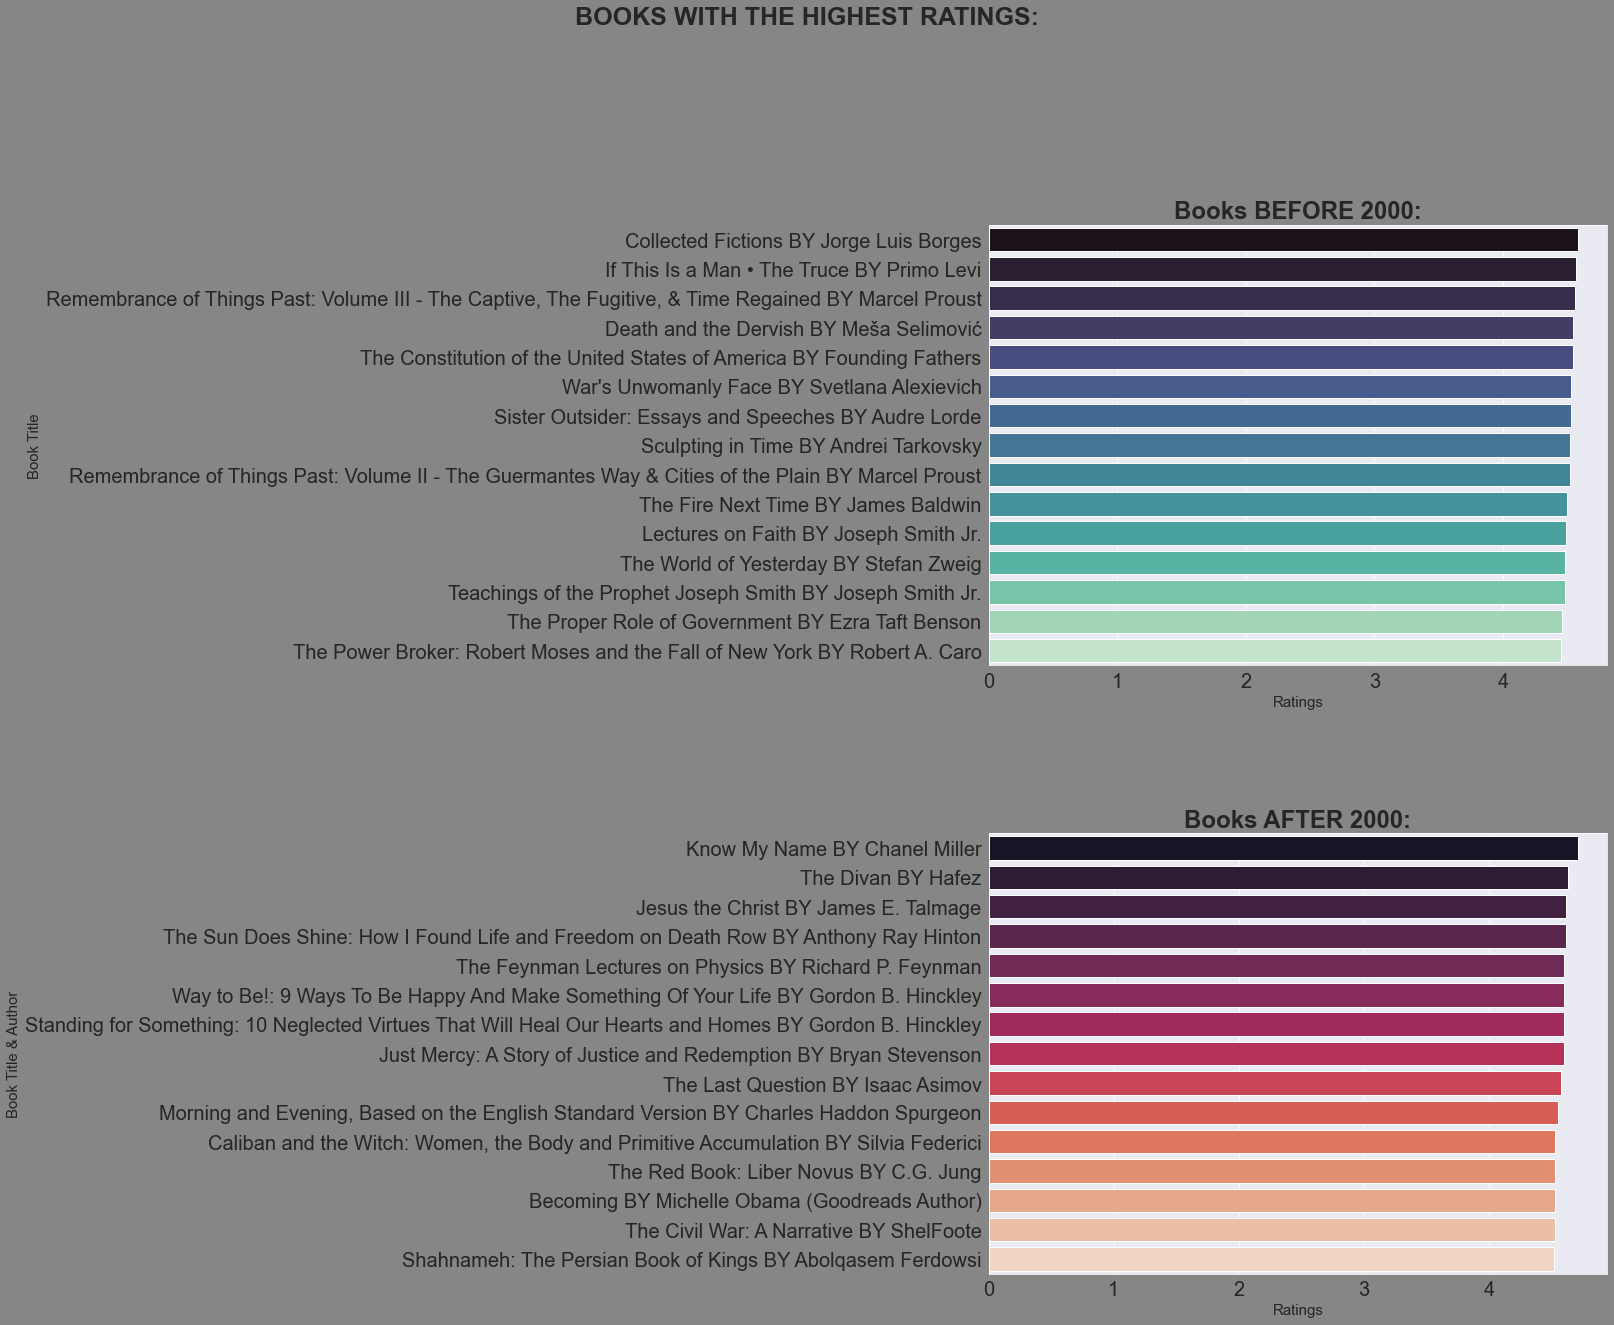

In [65]:
Bfnonfiction_df = bef_gen(list_df, nonfiction_genre)
Afnonfiction_df = aft_gen(list_df, nonfiction_genre)

req_Bf_df = Bfnonfiction_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afnonfiction_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 15. Erotica:
<b>Keywords:</b>
'Erotica', 'Erotic Historical Romance', 'Erotic Paranormal Romance'

<ipython-input-62-2398461f8bd5>:49: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Aindf = indf['2000' :]


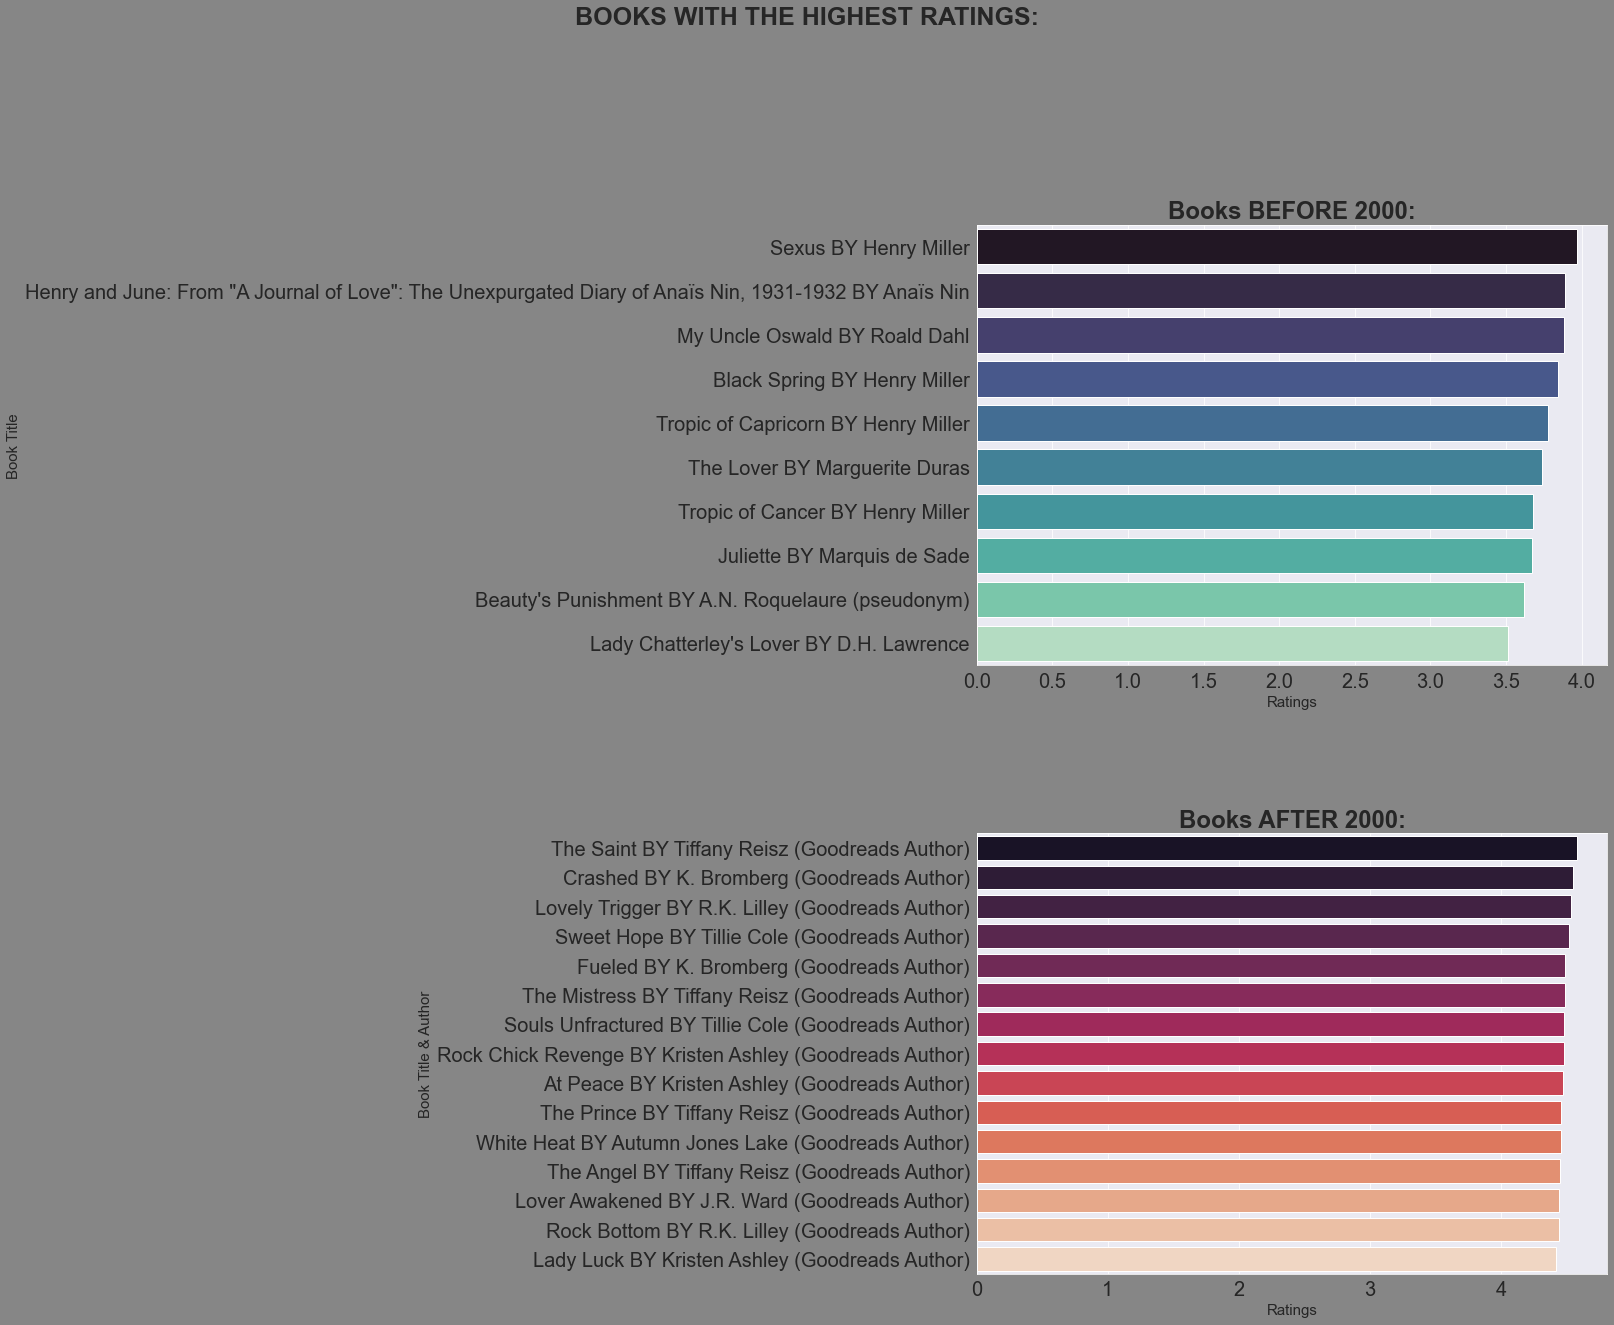

In [64]:
Bferotic_df = bef_gen(list_df, erotic_genre)
Aferotic_df = aft_gen(list_df, erotic_genre)

req_Bf_df = Bferotic_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Aferotic_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

## 16. Science Fiction and Post Apocalyptic

<b>Keywords:</b>
'Science Fiction'

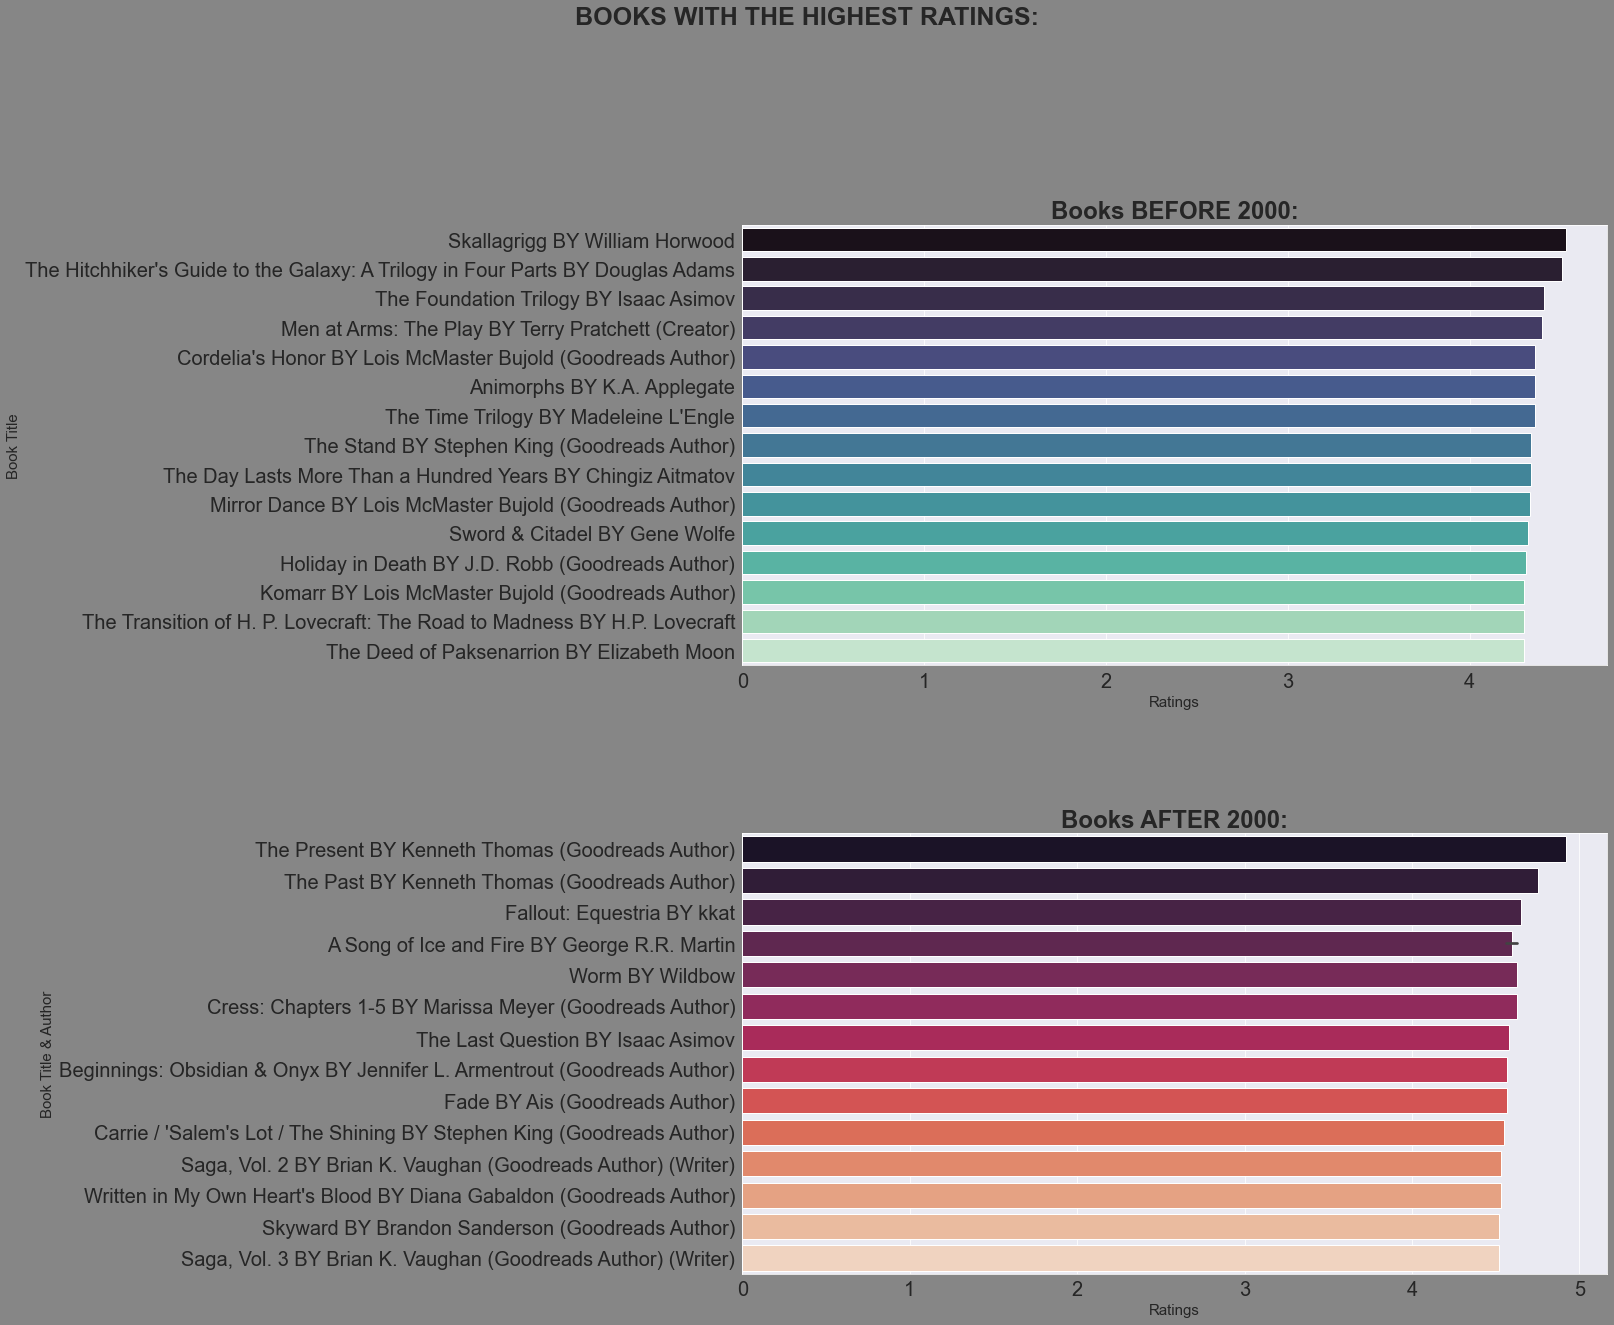

In [68]:
Bfscience_df = bef_gen(list_df, science_genre)
Afscience_df = aft_gen(list_df, science_genre)

req_Bf_df = Bfscience_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Bf_df = req_Bf_df['rating']

req_Af_df = Afscience_df.sort_values('rating', ascending = False).head(15).set_index('title_by_author')
req_Af_df = req_Af_df['rating']

bef_aft_graph(req_Bf_df, req_Af_df)

### "Books are the quietest and most constant of friends; they are the most accessible and wisest of counselors, and the most patient of teachers."
<b>-Charles W. Eliot

# SOME MORE VISUALIZATIONS:

## Top 15 highest rated( >4 ) + cheapest books(USD 0.84):

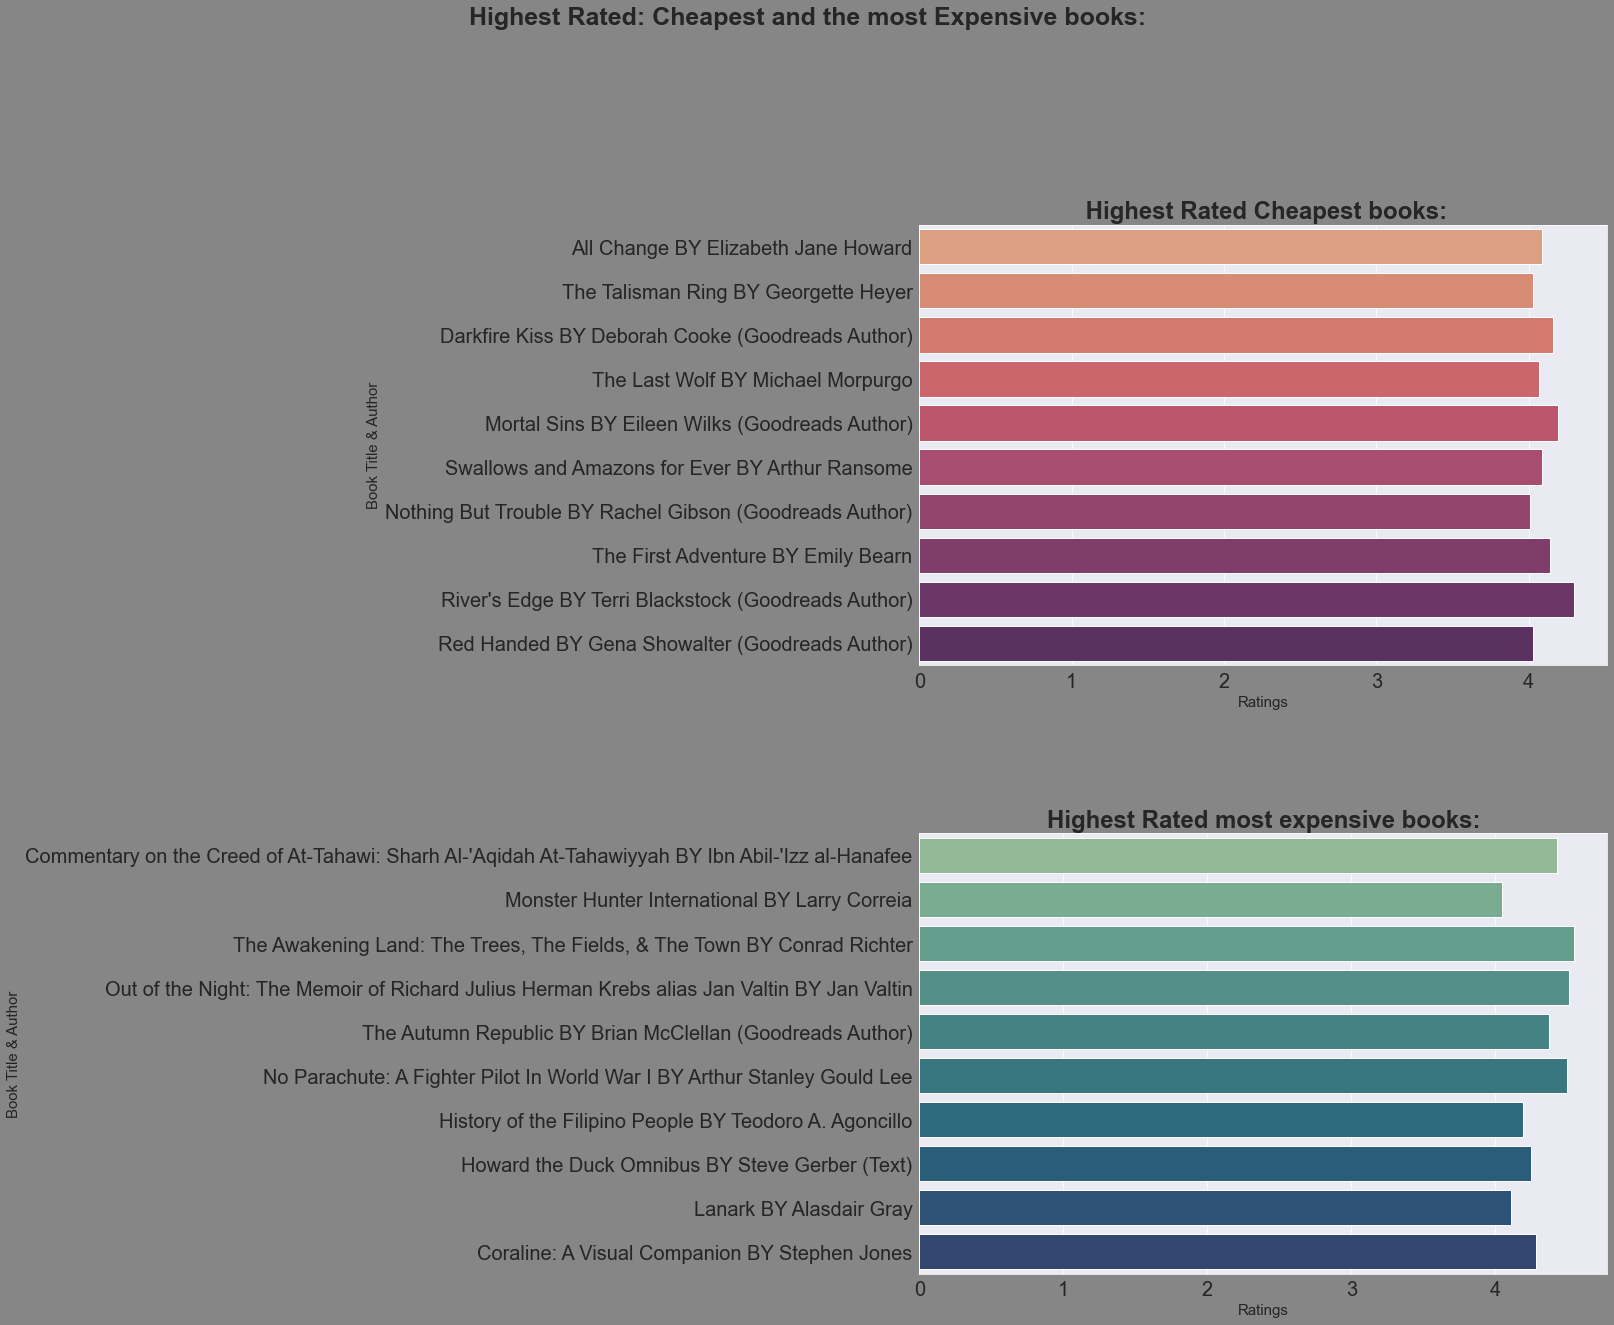

In [69]:

price_df = list_df.loc[list_df['rating'] > 4]

price_cheapdf = price_df.sort_values('price', ascending = True).head(10).set_index('title_by_author')
price_cheapcount = price_cheapdf['rating']

price_expdf = price_df.sort_values('price', ascending = False).head(10).set_index('title_by_author')
price_expcount = price_expdf['rating']

fig, axes = plt.subplots(2, 1, figsize=(25, 20));
fig.suptitle('Highest Rated: Cheapest and the most Expensive books:',fontweight='bold', fontsize= 25);
   
    
#Cheap
sns.barplot(ax=axes[0], x=price_cheapcount, y=price_cheapcount.index, palette = 'flare');
axes[0].set_title(' Highest Rated Cheapest books:',fontdict= { 'fontsize': 24, 'fontweight':'bold'});
axes[0].set_xlabel('Ratings',fontsize = 15);
axes[0].set_ylabel('Book Title & Author',fontsize = 15);

#Expensive
sns.barplot(ax=axes[1], x=price_expcount, y=price_expcount.index, palette = 'crest');
axes[1].set_title('Highest Rated most expensive books:',fontdict= { 'fontsize': 24, 'fontweight':'bold'});
axes[1].set_xlabel('Ratings',fontsize = 15);
axes[1].set_ylabel('Book Title & Author',fontsize = 15);

plt.tight_layout(pad=5);


### "It is what you read when you don't have to that determines what you will be when you can't help it."
<b>-Oscar Wilde

## Finally, Top 10 books with the highest number of Total Ratings:

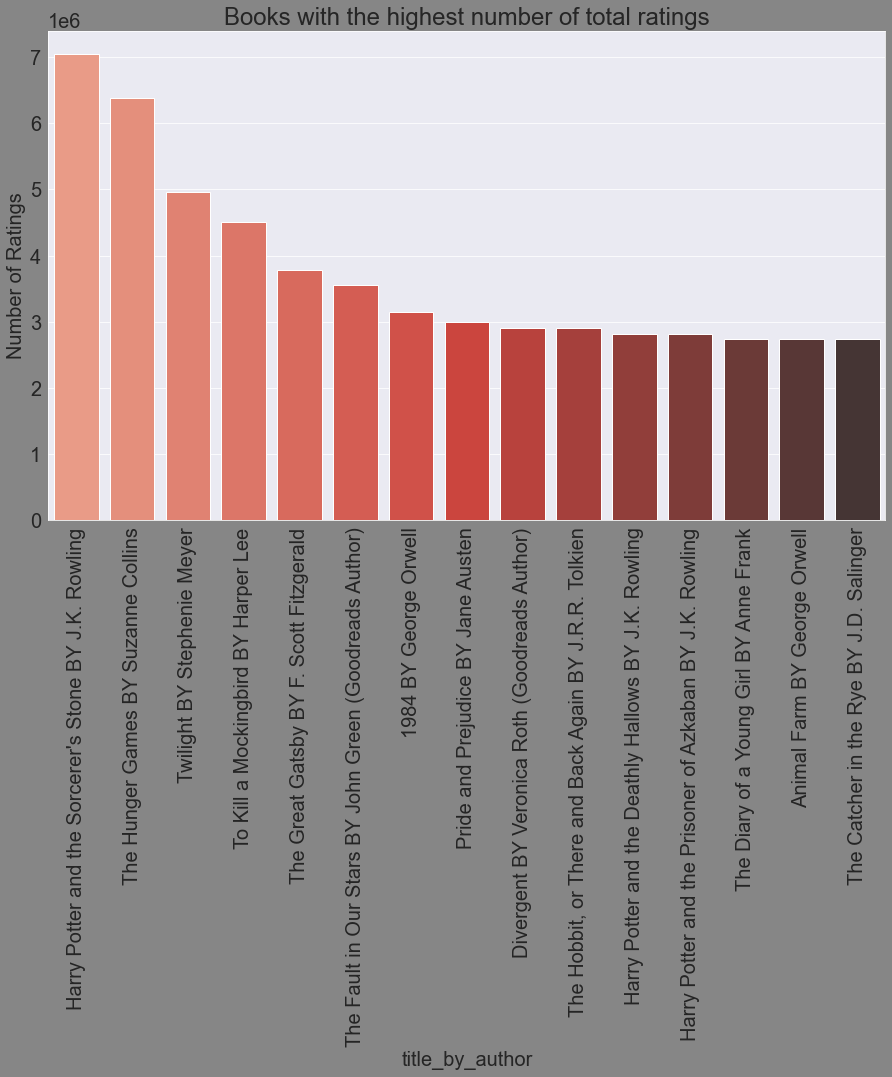

In [70]:
top_numRating = list_df.set_index('title_by_author')
top_numRating = top_numRating.sort_values('numRatings', ascending = False).head(15)
numRating_count = top_numRating['numRatings']

plt.figure(figsize = (15,9))
sns.barplot(x= numRating_count.index, y= numRating_count, palette="Reds_d")
plt.title('Books with the highest number of total ratings')
plt.ylabel("Number of Ratings");
plt.xticks(rotation=90);

### “Good friends, good books, and a sleepy conscience: this is the ideal life.”
<b>-Mark Twain

### "In the case of good books, the point is not to see how many of them you can get through, but rather how many can get through to you."
<b>-Mortimer J. Adler

Reading a book till the very end (or even halfway through) only to realize it was not as good as we'd expected can be very frustrating and regretful. We cannot afford to spend our valuable time on something just not worth the while! Choosing the right book(s) can be a very intense and confusing task- it's always better to do some research before making a decision. So, I really hope that this book recommender system of mine, driven completely by DATA helped(helps) make a difference in your search for the perfect book(s).



P.S. This was just a static recemmendation system, and I'll be creating a user-friendly one where you can choose/set your own criteria.

### Finally, as I mentioned in the beginning, here are the direct links to download some books:

1. [The complete Harry Potter series](http://library.lol/main/B6C7944924F3656161557FC520DE7D4C)
2. [The Hunger Games 1](http://library.lol/main/8AEE34DEE4A493443EE178B8F3C2D93A)
3. [The Magic of Thinking Big](http://library.lol/main/6890F21A75D476EF281C8AA42F593C6F)
4. [The Way of Kings](http://library.lol/main/F13411F5B1262CBBBAC0437666901BDC)
5. [The Miracle of Mindfulness](http://library.lol/main/1036DDAB73FCDECC3E5A32319ADA14CB)
6. [Man's search for meaning](http://library.lol/main/8A562CBFE277DE98C92865B5305B65FE)
7. [Mark of the lion(A voice in the wind)](http://library.lol/main/593DCBA684EC9CD2177BA2801DA72D46)
8. [Siddhartha](http://library.lol/main/49214A6455443AC712021BA35A37BFC7)
9. [The French Lieutenant's Woman](http://library.lol/main/3AB8DFD4049B1F002D7602E6861C5F01)
10. [It's a magical world](http://library.lol/main/7C14993FAFB4472B87A176CF6476B1D7)
11. [The Red Book](http://library.lol/main/922F0DF3D990B79F6E7E417DA6A969B0)
12. [The Man who planted trees](http://library.lol/main/56F2453971CA9A010DEFA3431D09D137)
13. [Collected Fictions](http://library.lol/main/F99402AE51086BDE12EE2319FD45BC48)
14. [Money, and the Law of Attraction: Learning to Attract Wealth, Health, and Happiness](http://library.lol/main/F08B4B9CF77F8AAA81E97040882CCBD1)
15. [Factfulness: Ten Reasons We’re Wrong About the World—and Why Things Are Better Than You Think](http://library.lol/main/2D87818A58BB1BD03E3885B269E109D5)
16. [The seven spiritual laws of success: a practical guide to the fulfillment of your dreams](http://library.lol/main/823E99E1155C1305A2C2BF1E73CEFCE9)
17. [A song of Ice and Fire](https://libgen.rs/book/index.php?md5=CDD10E6C84D3369638716C4593976C52)
18. [How to win friends and influence people](http://library.lol/main/CCDFF34CFF5D07C2E340A403EF26AB34)
19. [Death; An Inside Story: A book for all those who shall die](http://library.lol/main/CA779A6DFE00A77B863FDD9587F26EE6)
20. [To Kill a Mockingbird](http://library.lol/main/AF4E3928D016D9B7919CB7DA5009AA70)

<b>And I'm ending this analysis with some of my favorite quotes on books:</b>
### “If there's a book that you want to read, but it hasn't been written yet, then you must write it.”
<b>-Toni Morrison</b>

### "I can never read all the books I want; I can never be all the people I want and live all the lives I want. I can never train myself in all the skills I want. And why do I want to? I want to live and feel all the shades, tones and variations of mental and physical experience possible in my life. And I am horribly limited."
<b>-Sylvia Plath</b>

### “Where is human nature so weak as in the bookstore?”
<b>-Henry Ward Beecher</b>

### "I was born with a reading list I will never finish."
<b>- Maud Casey</b>
   

### References:

https://www.geeksforgeeks.org/

https://stackoverflow.com/

https://www.w3schools.com/python

https://libgen.rs/

https://datascience.stackexchange.com

https://github.com/scostap/goodreads_bbe_dataset/blob/main/Best_Books_Ever_dataset/books_1.Best_Books_Ever.csv